# Introduction to Smoke Detection

### Context

A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

### Types of Smoke Detectors
##### Photoelectric Smoke Detector
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.

##### Ionization Smoke Detector
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current difference has developed between the open and sealed chambers, and sounds the alarm
The author of this dataset has successfully created a smoke detection device with the help of IOT devices and AI model.

### About the Dataset

Collection of training data is performed with the help of IOT devices since the goal is to develop a AI based smoke detector device. Many different environments and fire sources have to be sampled to ensure a good dataset for training. A short list of different scenarios which are captured:

- Normal indoor
- Normal outdoor
- Indoor wood fire, firefighter training area
- Indoor gas fire, firefighter training area
- Outdoor wood, coal, and gas grill
- Outdoor high humidity etc.
- The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. To keep track of the data, a UTC timestamp is added to every sensor reading.

The dataset contains air properties gotten from the proposed sorrounding of the experiment.

##### The dataset has 16 columns which are:

- UTC - The time when experiment was performed.
- Temperature - Temperature of Surroundings. Measured in Celsius
- Humidity - The air humidity during the experiment.
- TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
- eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
- Raw H2 - The amount of Raw Hydrogen present in the surroundings.
- Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
- Pressure - Air pressure. Measured in hPa
- PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
- PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
- NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
- NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
- NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
- CNT - Simple Count. Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

In [104]:
# Import all required modules
import numpy as np
import pandas as pd

# Import plotting modules and set up
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
rcParams["figure.figsize"] = 8, 5
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Ingestion

In [105]:
DATA_PATH = "./data/smoke_detection_iot.csv"

In [106]:
df = pd.read_csv(DATA_PATH, index_col=0)

## Understanding and Exploring the Dataset

In [107]:
df.sample(10)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
25995,1654762344,14.390,49.94,28,400,13013,19908,939.748,0.23,0.24,1.56,0.244,0.006,1001,0
48587,1654784936,26.690,48.76,1354,406,12976,19394,938.737,1.72,1.79,11.86,1.850,0.042,23593,1
60131,1655127553,17.124,48.03,198,427,12764,20518,937.375,1.87,1.94,12.86,2.005,0.045,3245,0
21334,1654754665,-2.531,49.80,1381,415,12950,19386,938.706,2.04,2.11,14.01,2.184,0.049,21334,1
35800,1654772149,23.820,54.23,1000,668,12787,19472,939.062,2.28,2.37,15.68,2.446,0.055,10806,1
27967,1654764316,21.260,45.12,159,400,13154,20011,939.653,0.94,0.97,6.45,1.006,0.023,2973,0
18127,1654751458,18.778,49.60,1155,400,12914,19444,938.718,2.03,2.11,14.00,2.184,0.049,18127,1
55457,1654716502,43.200,30.51,7100,400,12995,19508,936.869,0.44,0.46,3.06,0.477,0.011,4315,0
12560,1654745891,20.199,47.26,1076,539,12830,19463,938.960,1.85,1.93,12.76,1.989,0.045,12560,1
51355,1654712400,29.420,40.28,65,416,12842,20721,937.555,2.17,2.25,14.90,2.324,0.052,213,0


In [108]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [109]:
df.shape

(62630, 15)

In [110]:
df.size

939450

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [112]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04
PM2.5,62630.0,1.844678e+02,1976.305615,0.000000e+00,1.340000e+00,1.880000e+00,2.180000e+00,4.543226e+04


In [113]:
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [114]:
df.nunique()

UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

#### Observations

* There are total of 62360 rows and 15 coloumns in data.
* Data contains no missing value.
* We do not have any categorical feature
* There are a total of 810680 (62360 x 13) observations .

In [115]:
temp_utc = pd.to_datetime(df['UTC'],unit='s')
temp_utc

0       2022-06-09 00:08:51
1       2022-06-09 00:08:52
2       2022-06-09 00:08:53
3       2022-06-09 00:08:54
4       2022-06-09 00:08:55
                ...        
62625   2022-06-13 14:20:47
62626   2022-06-13 14:20:48
62627   2022-06-13 14:20:49
62628   2022-06-13 14:20:50
62629   2022-06-13 14:20:51
Name: UTC, Length: 62630, dtype: datetime64[ns]

#### Exploring the time of recorded dataset

In [116]:
temp_utc.dt.month.value_counts()

UTC
6    62630
Name: count, dtype: int64

In [117]:
temp_utc.dt.year.value_counts()

UTC
2022    62630
Name: count, dtype: int64

In [118]:
temp_utc.dt.day.value_counts()

UTC
9     49988
8      5744
13     5744
10     1154
Name: count, dtype: int64

In [119]:
day_part = pd.cut(temp_utc.dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [120]:
day_part.value_counts()

UTC
Night        21600
Morning      19474
Afternoon    14202
Evening       4285
Name: count, dtype: int64

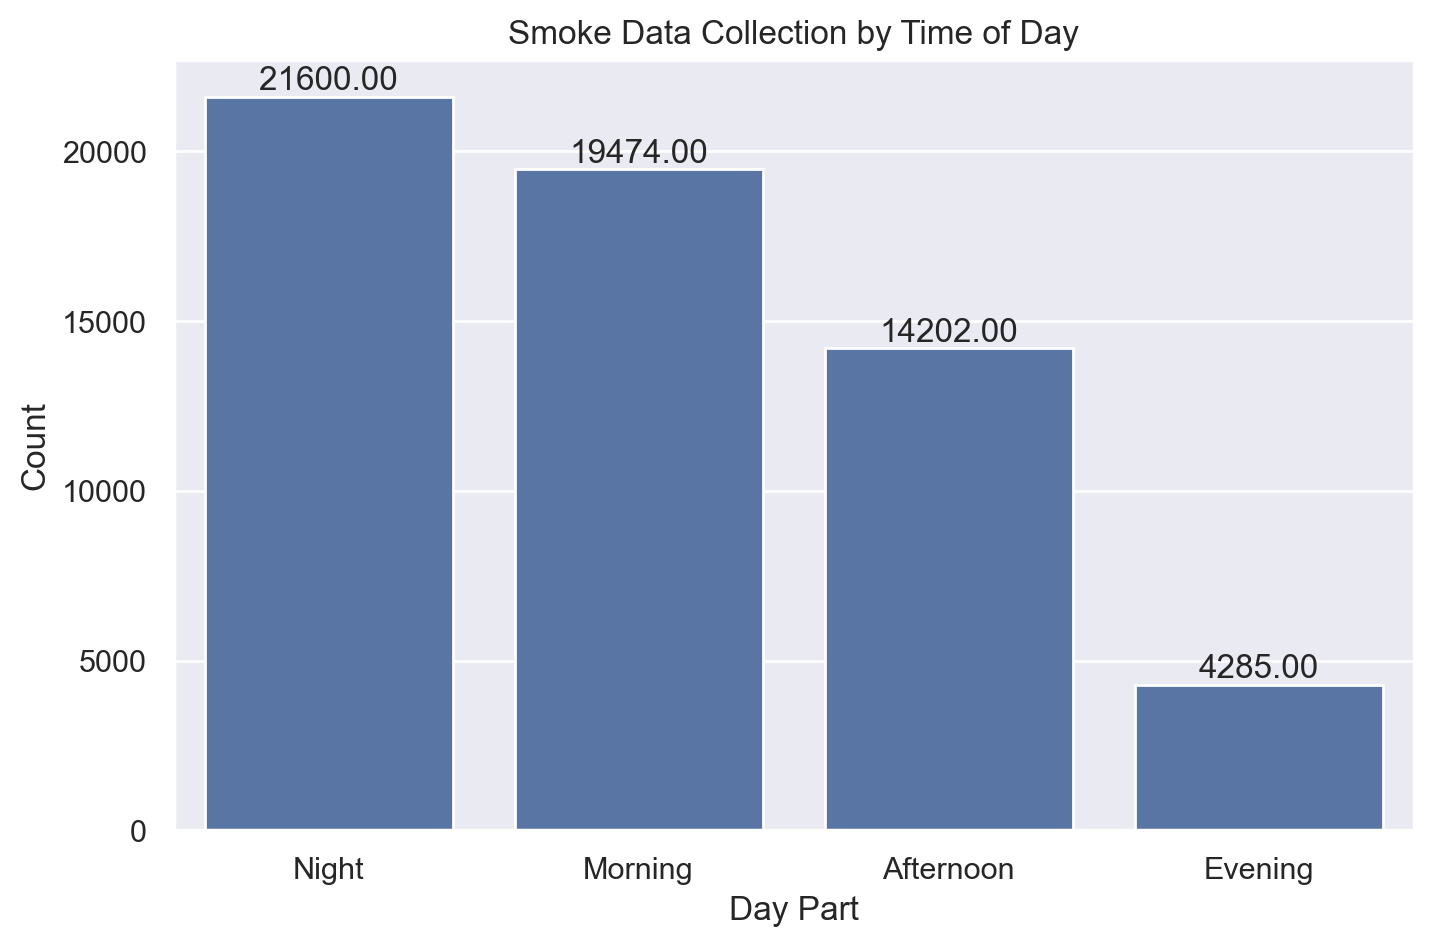

In [121]:
plt.figure(figsize=(8, 5))

# day_part.value_counts().plot(kind='bar')
ax = sns.barplot(data=day_part.value_counts())
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('Day Part')
plt.ylabel('Count')
plt.title('Smoke Data Collection by Time of Day')
plt.show()


#### Insights:

* Nighttime Dominance: The data indicates that the majority of the activity or events occurred during the night (UTC). This represents approximately 40% of the total occurrences.
* Morning Peak: The morning period (UTC) also saw a substantial number of events, constituting around 36% of the total.
* Afternoon and Evening: The afternoon and evening periods combined account for less than 34% of the total occurrences, suggesting a lower activity level during these times.

In [122]:
df.sample(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
4729,1654738060,-6.911,53.49,60,400,13240,20151,939.656,2.34,2.43,16.07,2.507,0.057,4729,1
28550,1654764899,22.290,53.17,321,400,13113,19894,939.685,1.45,1.51,10.00,1.560,0.035,3556,1
58665,1655126087,-4.080,41.76,88,400,12789,20636,937.416,1.93,2.01,13.29,2.072,0.047,1779,0
50459,1654903476,38.070,16.68,261,3247,12571,19861,930.940,7.73,8.03,53.22,8.299,0.187,471,1
8361,1654741692,-4.587,56.11,326,400,13099,19935,939.357,0.31,0.32,2.10,0.328,0.007,8361,1


UTC and CNT can be deleted since they dont have any contribution in Firealarm.

In [123]:
# deleting unwanted columns
df = df.drop(columns=['UTC', 'CNT'])
df.sample(5)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
32402,18.690,54.80,273,400,13119,19993,939.515,0.52,0.54,3.56,0.555,0.013,1
42148,24.540,53.50,1212,415,12891,19433,938.798,1.63,1.70,11.23,1.752,0.040,1
23912,-15.747,48.48,1454,432,12966,19371,938.735,1.48,1.54,10.22,1.594,0.036,1
44045,25.980,47.31,1299,429,12905,19406,938.713,1.68,1.75,11.57,1.804,0.041,1
8242,-4.438,53.52,317,400,13099,19938,939.410,0.27,0.28,1.86,0.291,0.007,1


### EDA

Text(0.5, 1.0, 'Numbers of Fire Alarm')

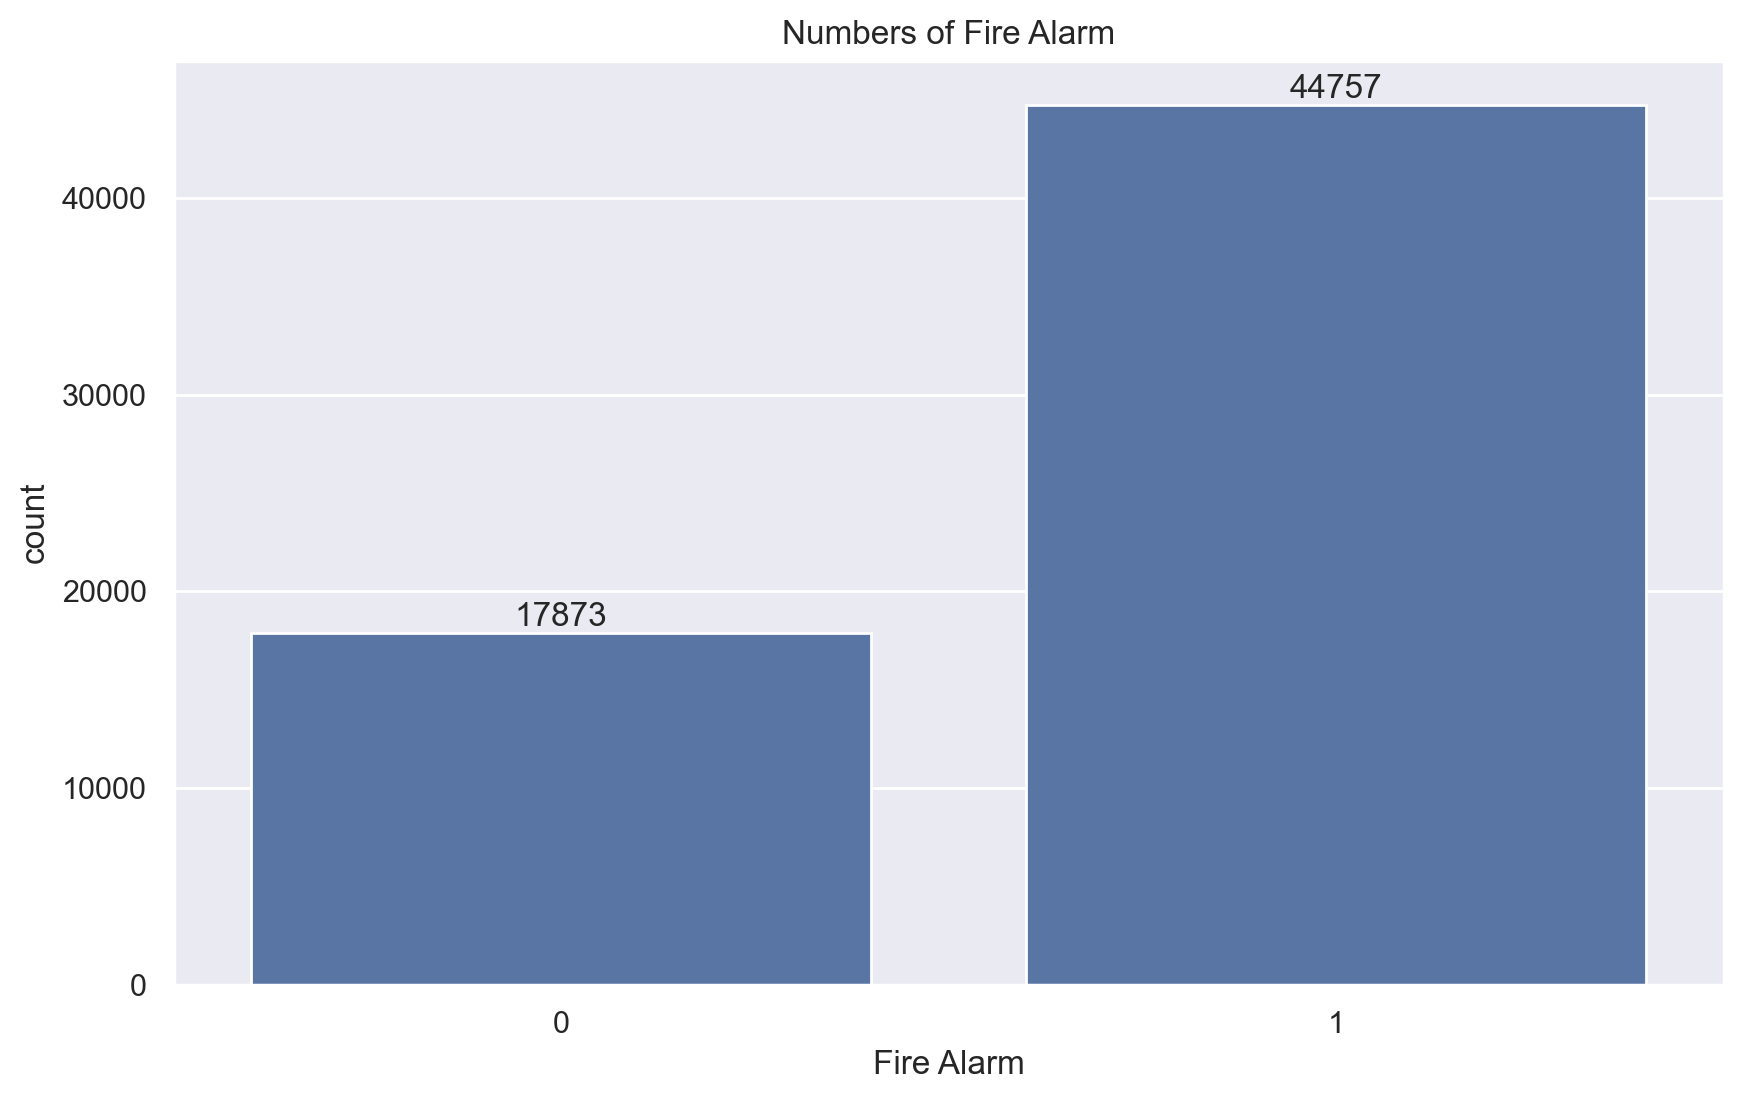

In [124]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df, x='Fire Alarm')
ax.bar_label(ax.containers[0])
plt.title("Numbers of Fire Alarm")

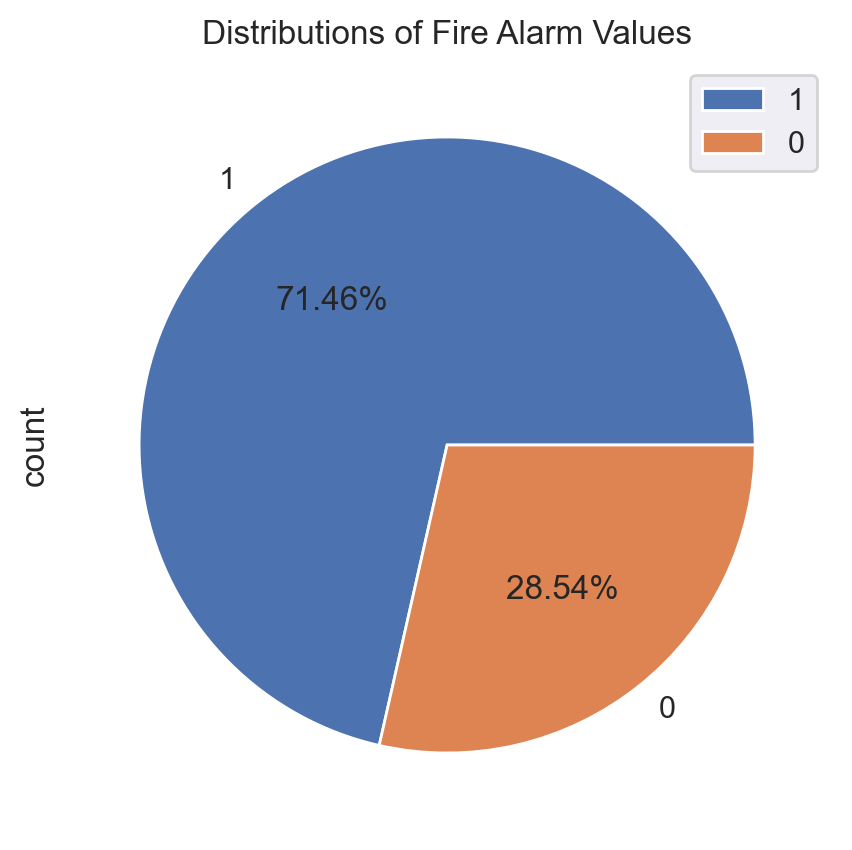

In [125]:
df['Fire Alarm'].value_counts().plot.pie( autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

* Most of the data took were during fire yes condition hence biasness in data needs to be taken care.

Above graph visualises strong positive correlation between concentration of PM1.0, PM2.5, NC0.5, NC2.5

In [126]:
# sns.histplot(data=df,x='Temperature[C]', bins=100, hue='Fire Alarm')

In [127]:
# plt.figure(figsize=(12,9))
# sns.distplot(df['Humidity[%]'])
# plt.show()

### Univariate Analysis

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

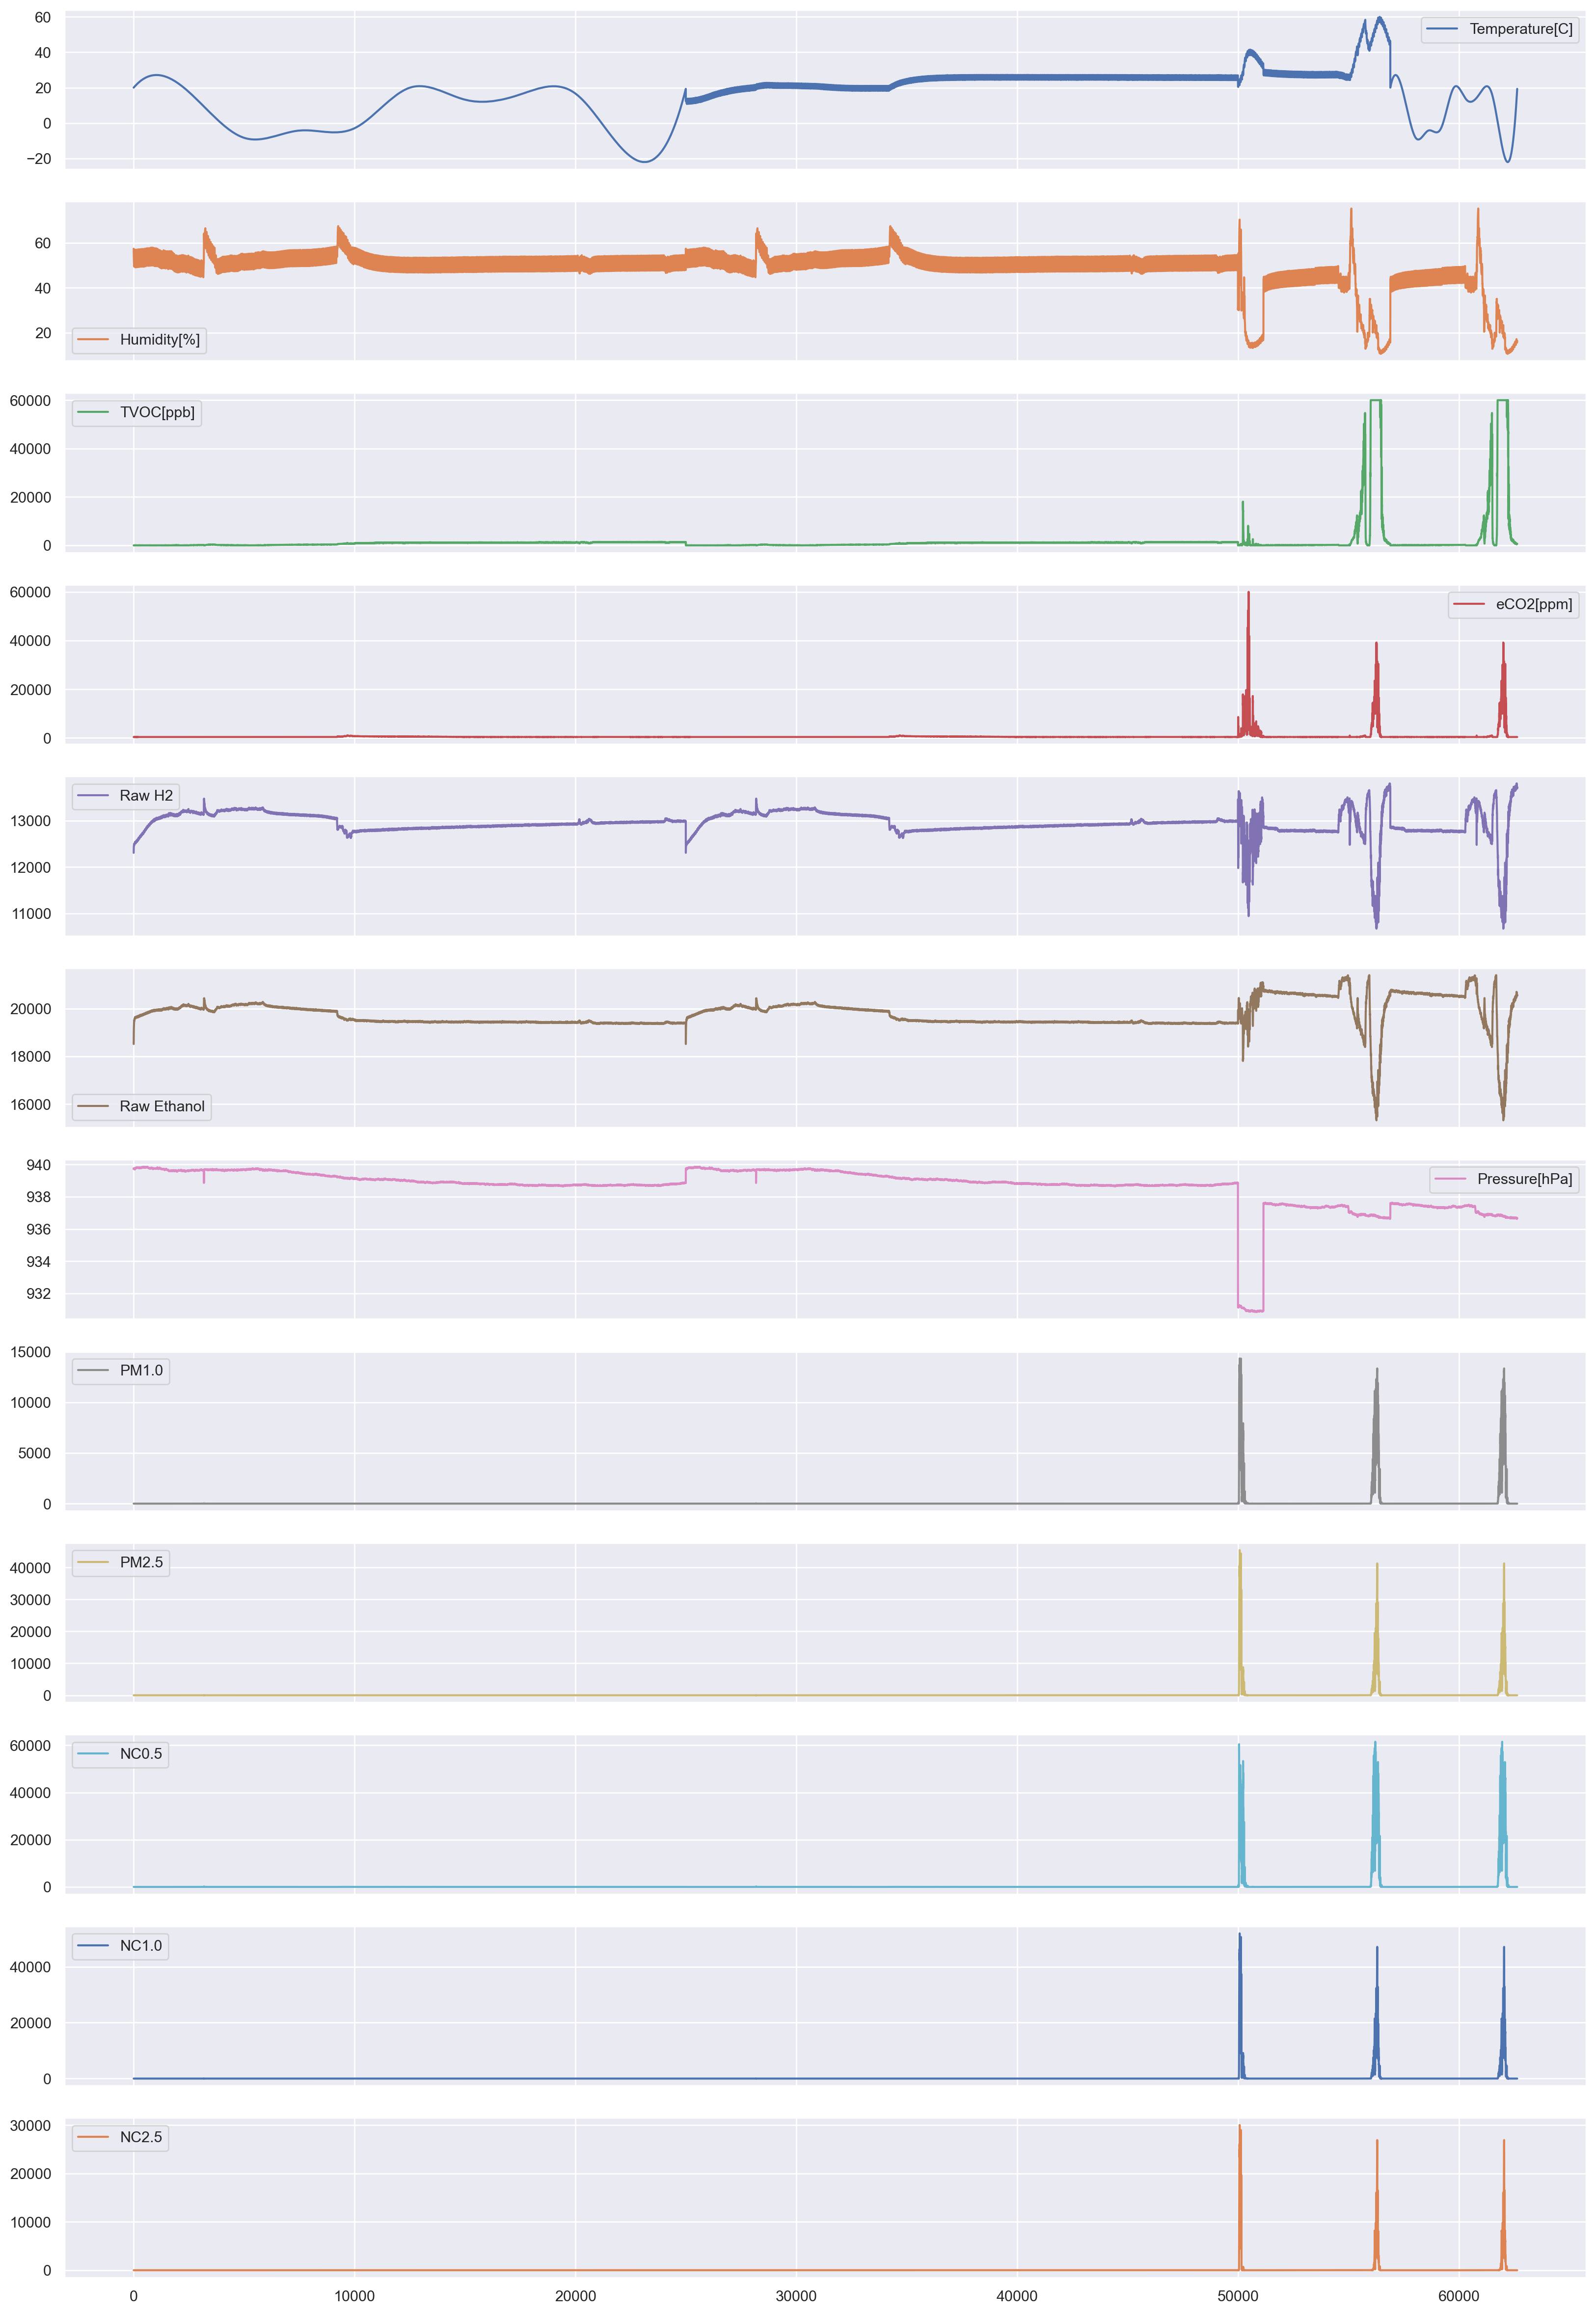

In [128]:
rcParams['figure.figsize'] = 20,30
df[['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']].plot(subplots = True)

* from the above graph strong relationship is found between the variables
* lets clarify it by using correlation


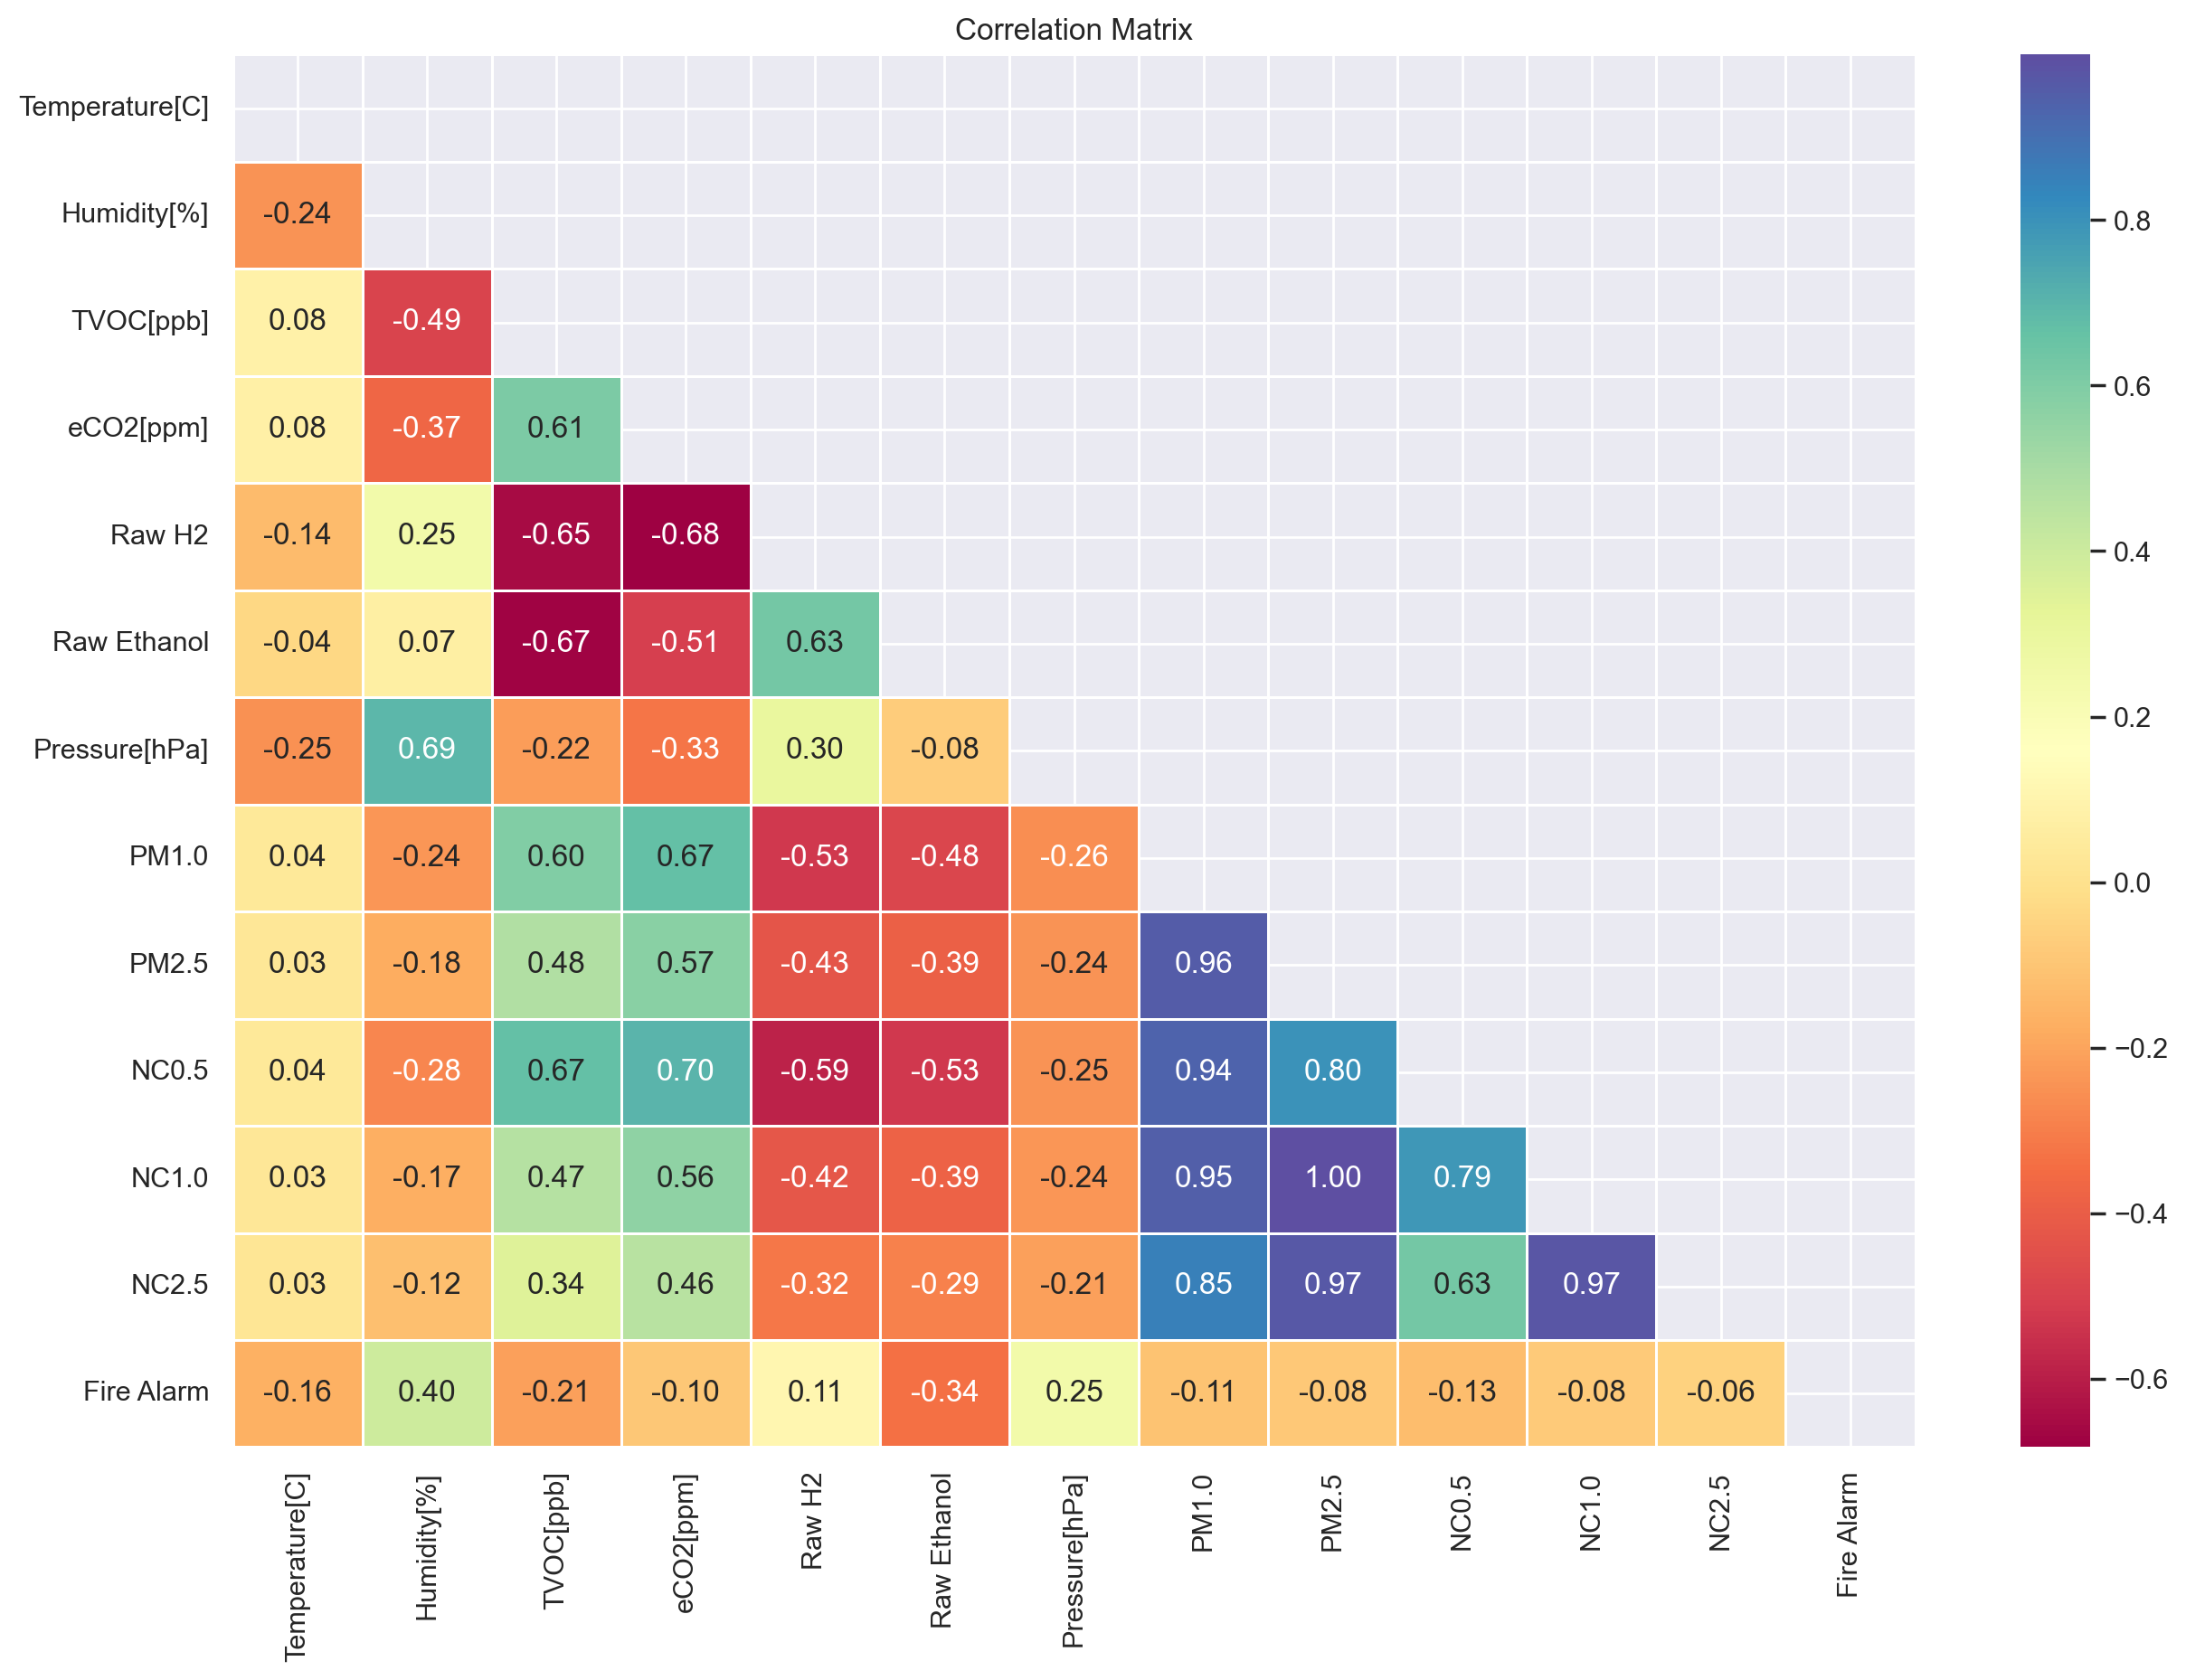

In [129]:
plt.figure(figsize = (15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='Spectral', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

There is a strong relation between the features

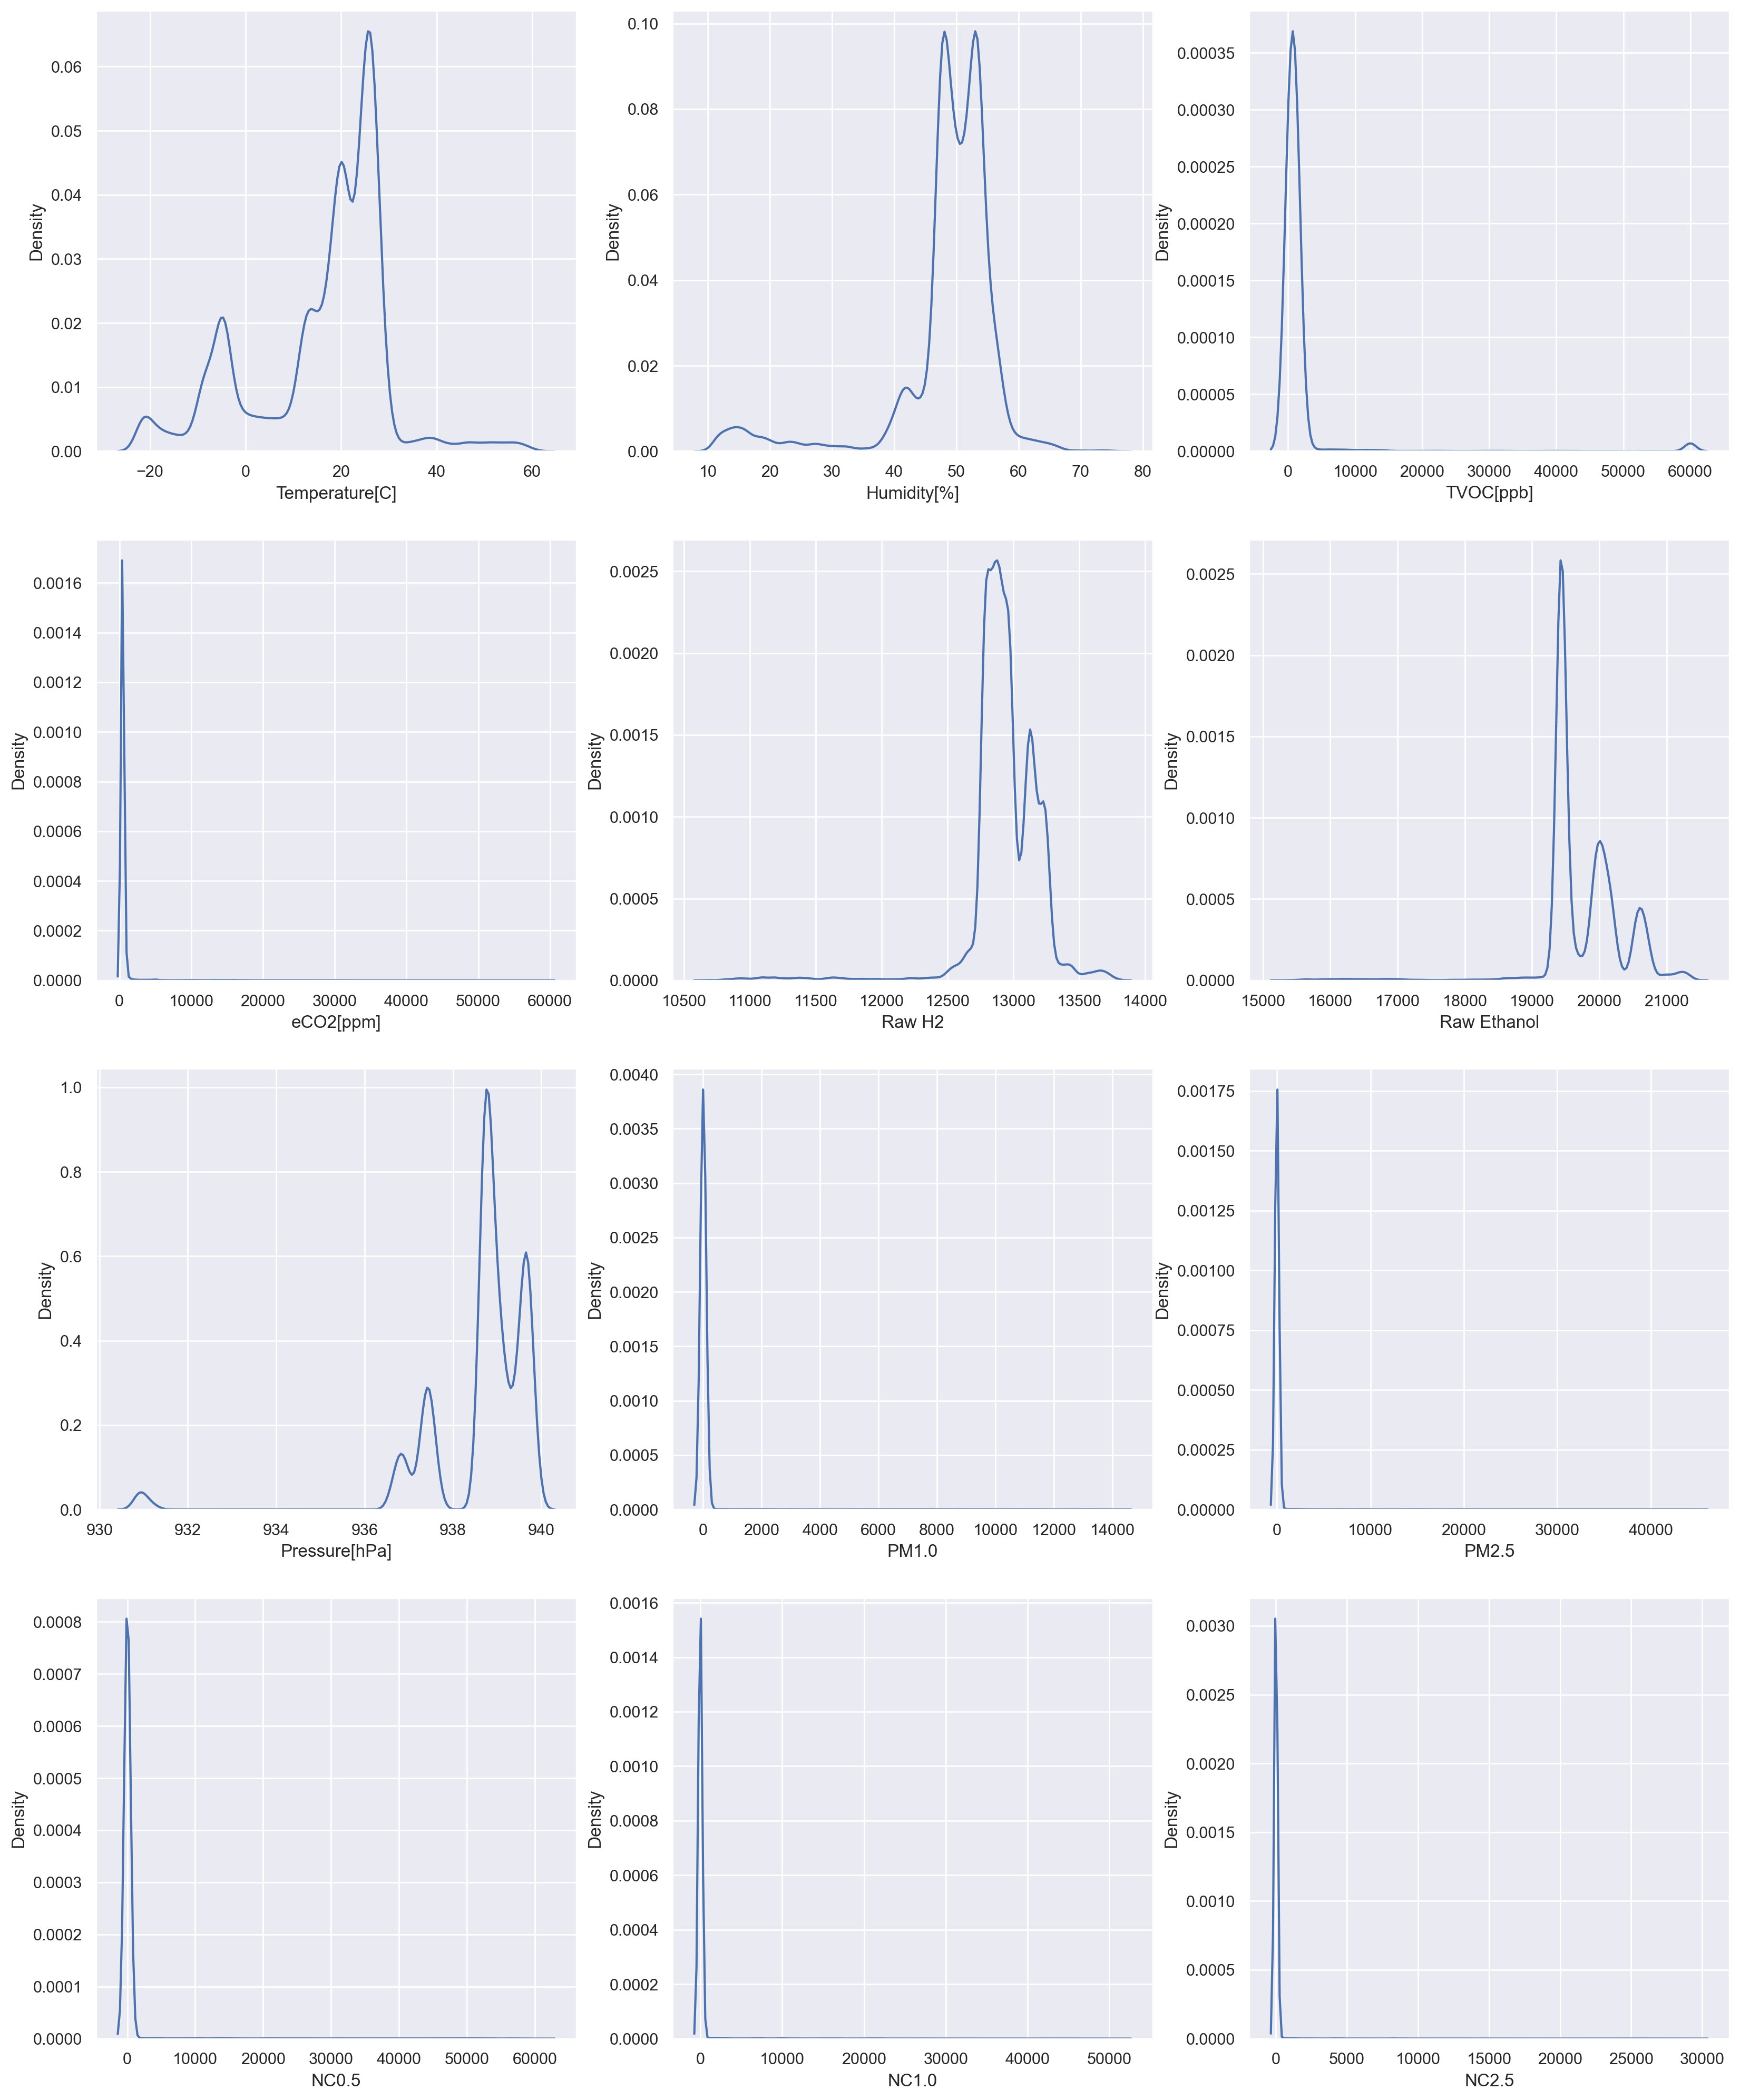

In [130]:
plt.figure(figsize=(20,25))
i=1
for col in df.drop('Fire Alarm',axis=1).columns:
    plt.subplot(4,3,i)
    sns.kdeplot(df[col])
    i+=1

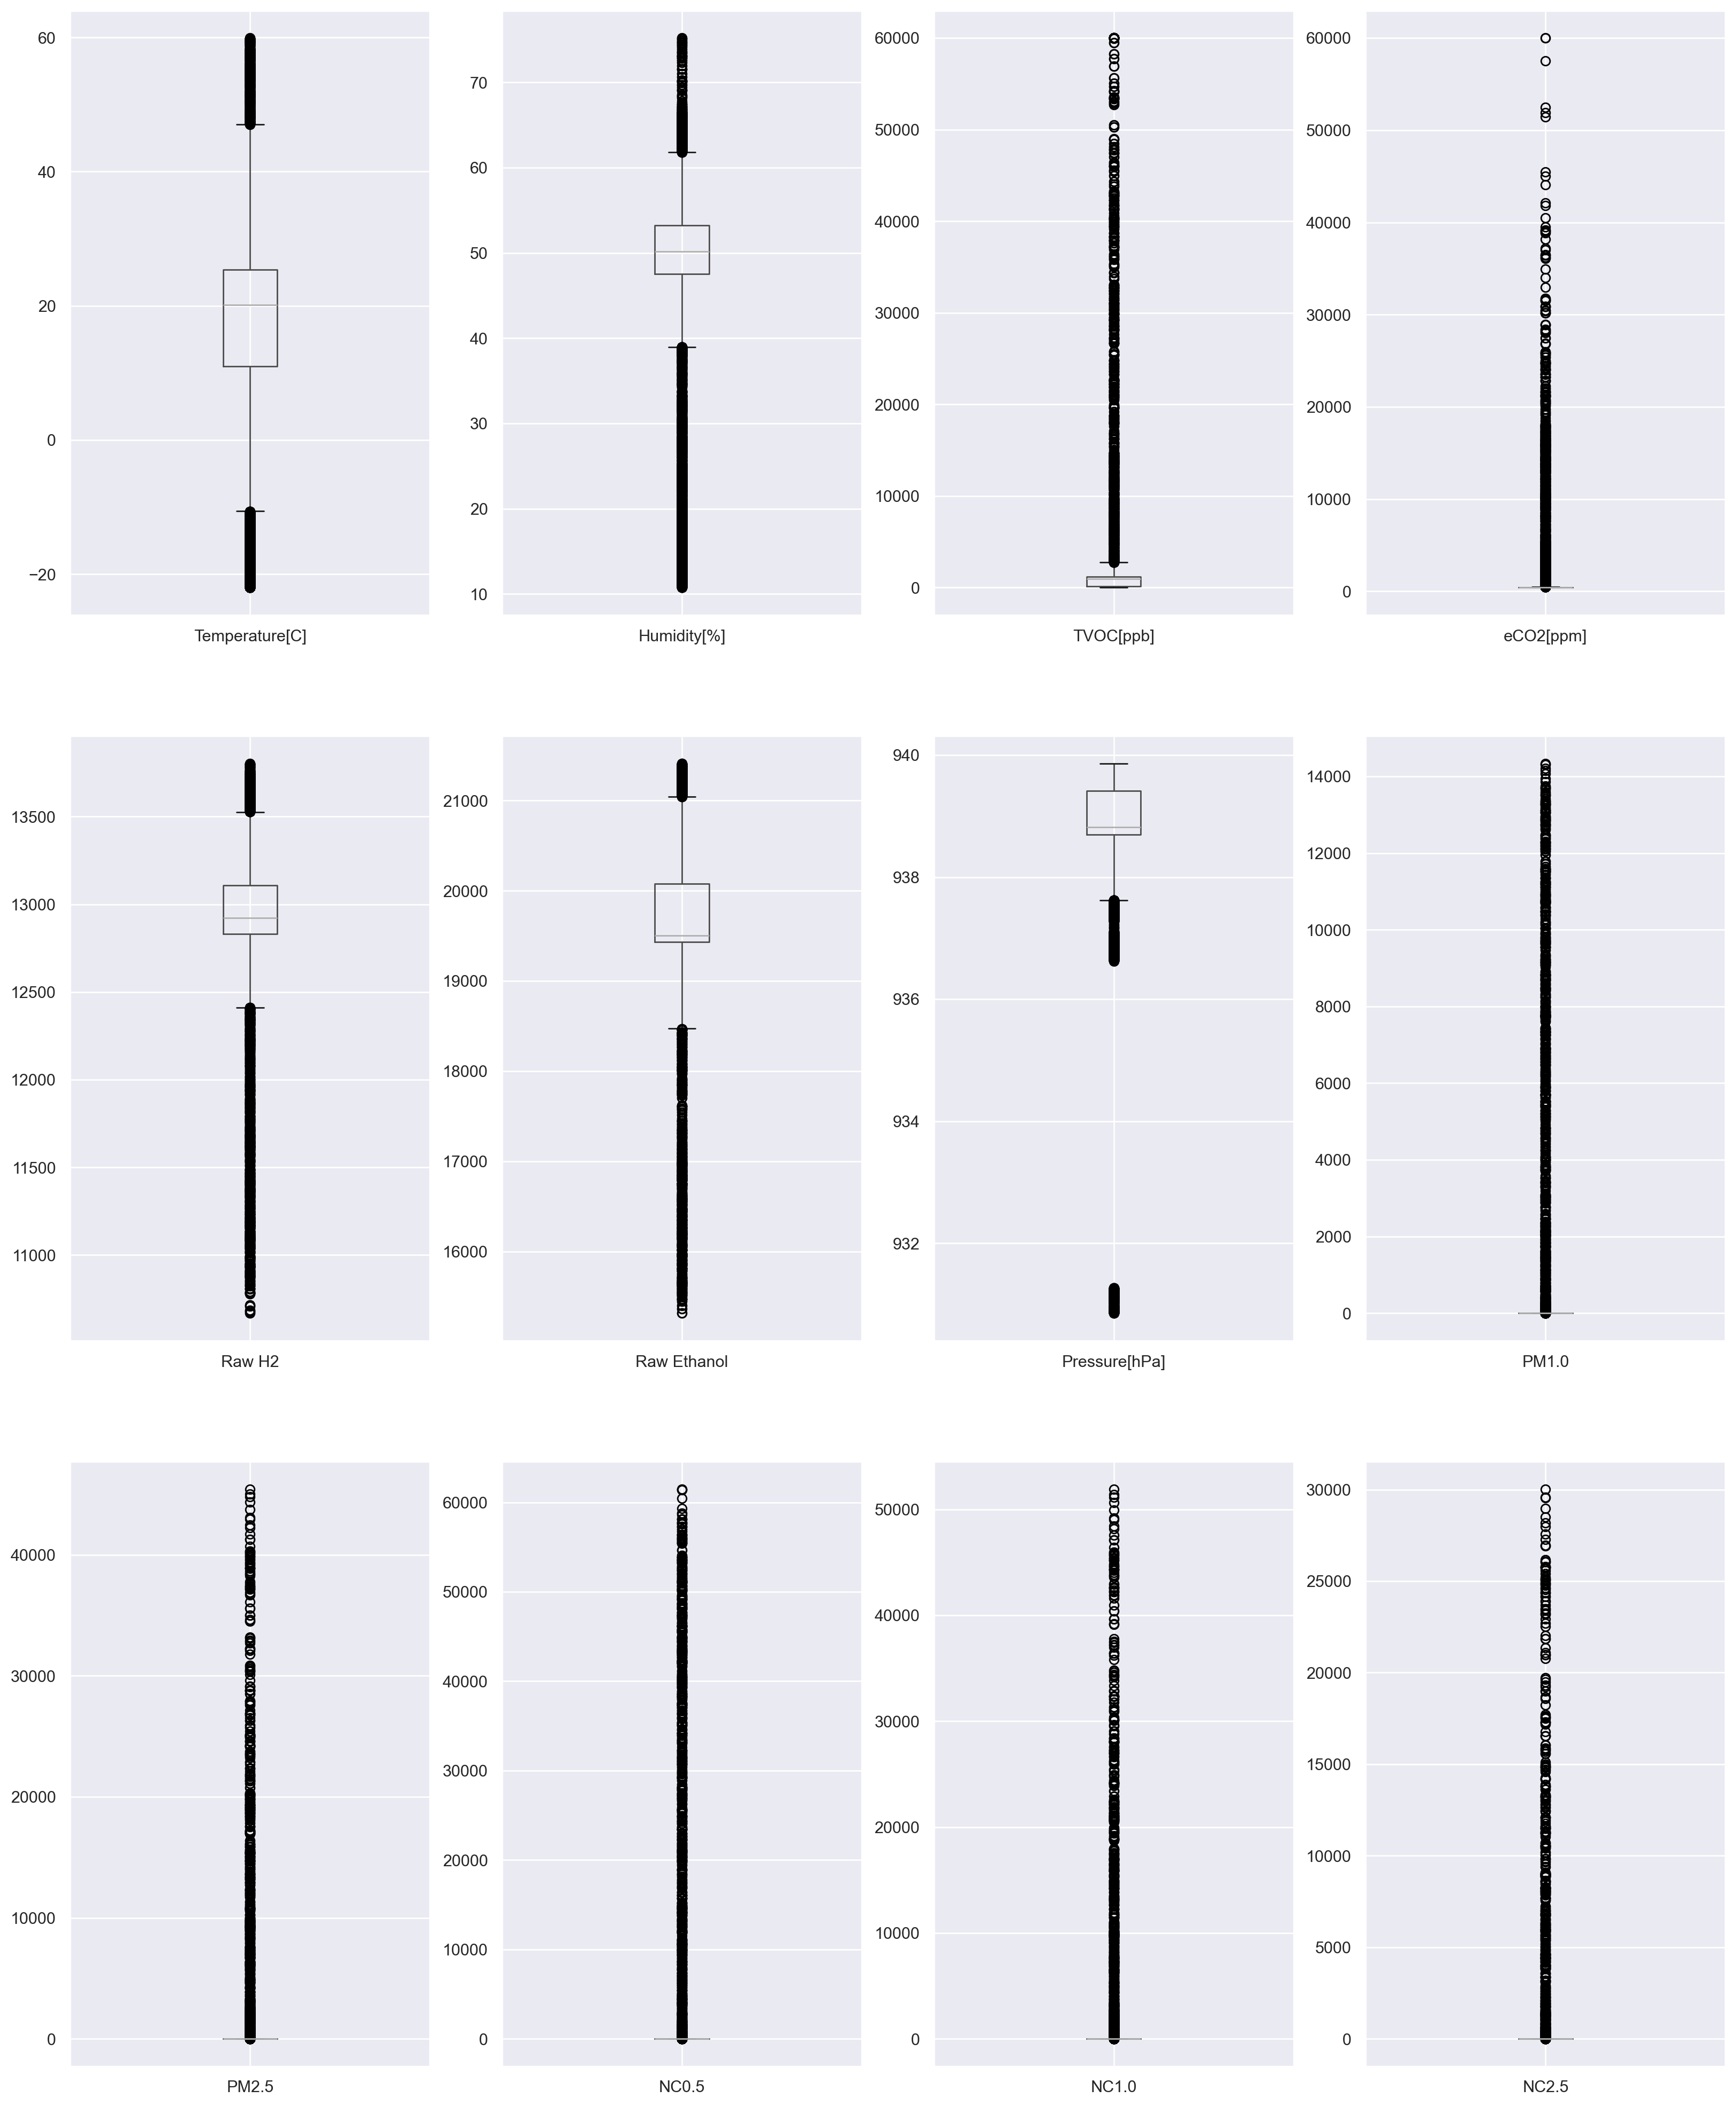

In [131]:
plt.figure(figsize=(20,25))
i=1
for col in df.drop('Fire Alarm',axis=1).columns:
    plt.subplot(3,4,i)
    df[[col]].boxplot()
    i+=1

### Bivariate Analysis

In [132]:
print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')


In [133]:
cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]','Pressure[hPa]']

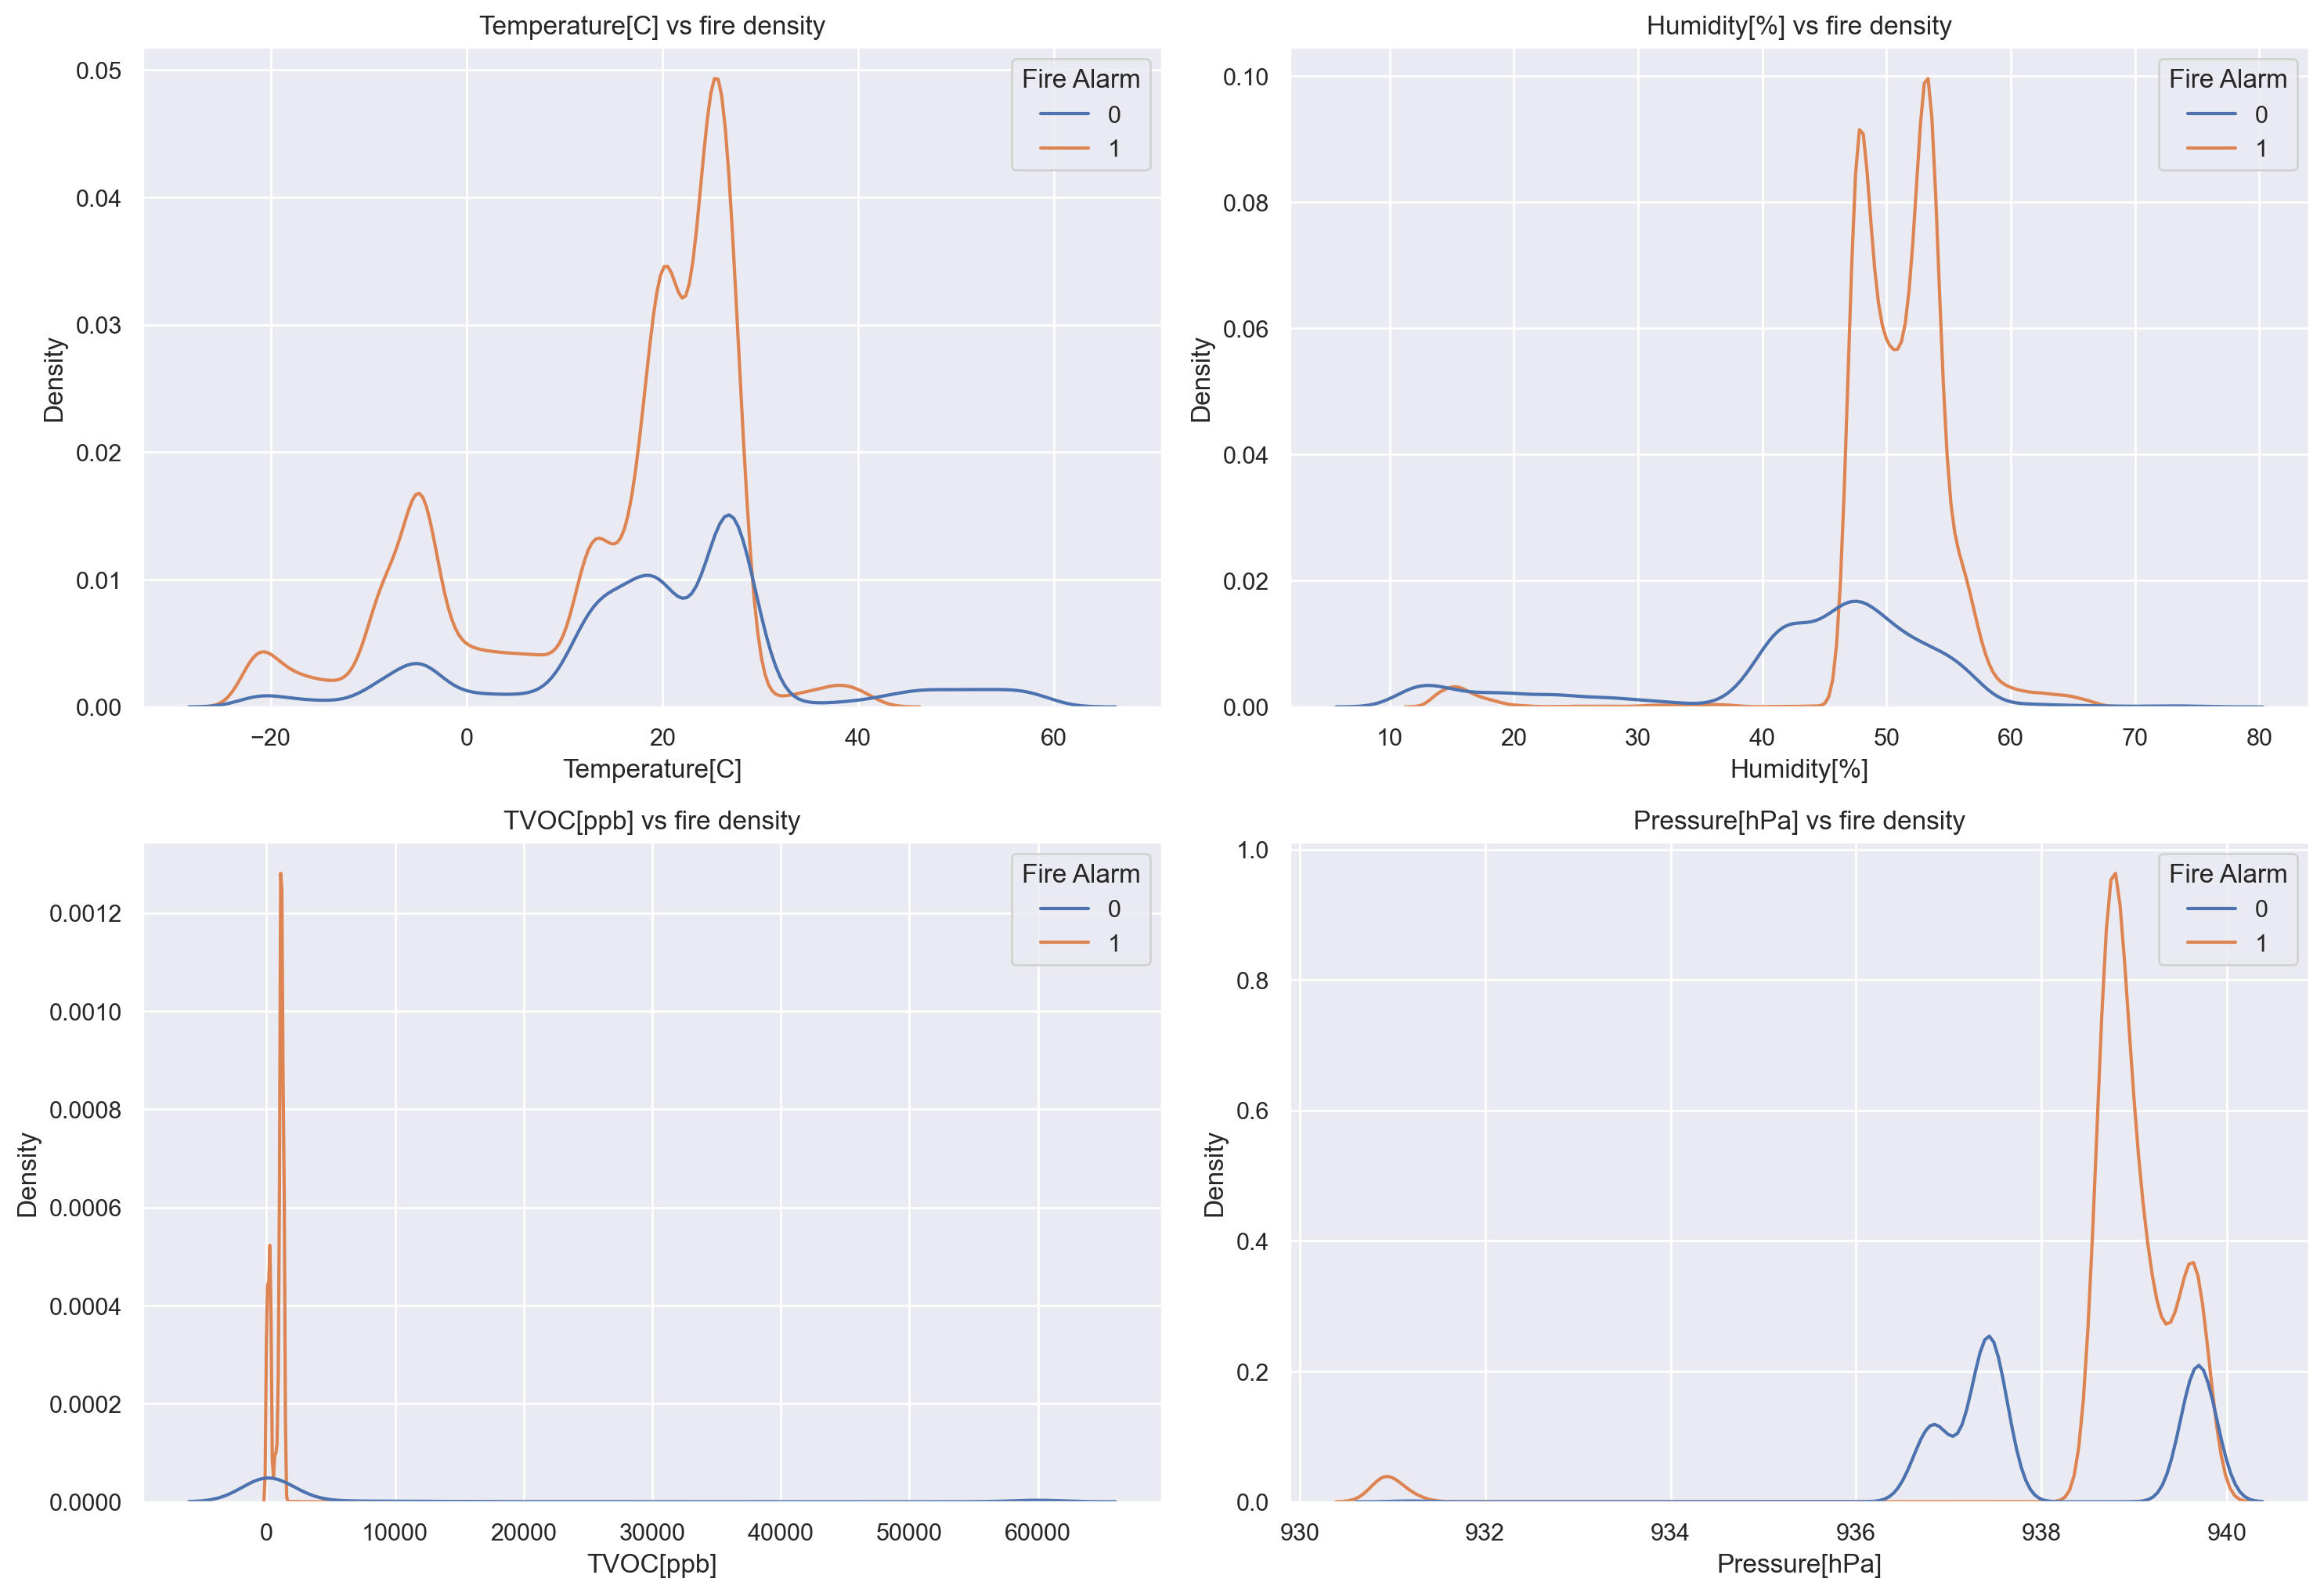

In [134]:

plt.figure(figsize=(15,20))
i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.kdeplot(data=df, x=col, hue='Fire Alarm')
    plt.title(f'{col} vs fire density')
#     plt.legend(loc='upper left', labels=['Fire', 'No Fire'])
    i+=1
plt.tight_layout()

### Observations
- At diffrent temperatures Fire may have higher density over No Fire
- Humidity and Pressure seems to seen more when theres a fire

In [135]:
df['TVOC[ppb]'].describe()

count    62630.000000
mean      1942.057528
std       7811.589055
min          0.000000
25%        130.000000
50%        981.000000
75%       1189.000000
max      60000.000000
Name: TVOC[ppb], dtype: float64

##### Since there is a huge difference between mean and max value of TVOC lets only look at the values between 0 to 5000ppb to understand better

In [136]:
filtered_tvoc = df[df['TVOC[ppb]']<5000]
filtered_tvoc.shape[0]

60469

Text(0.5, 1.0, 'Total volatile compounds within range of 5000ppb vs fire density')

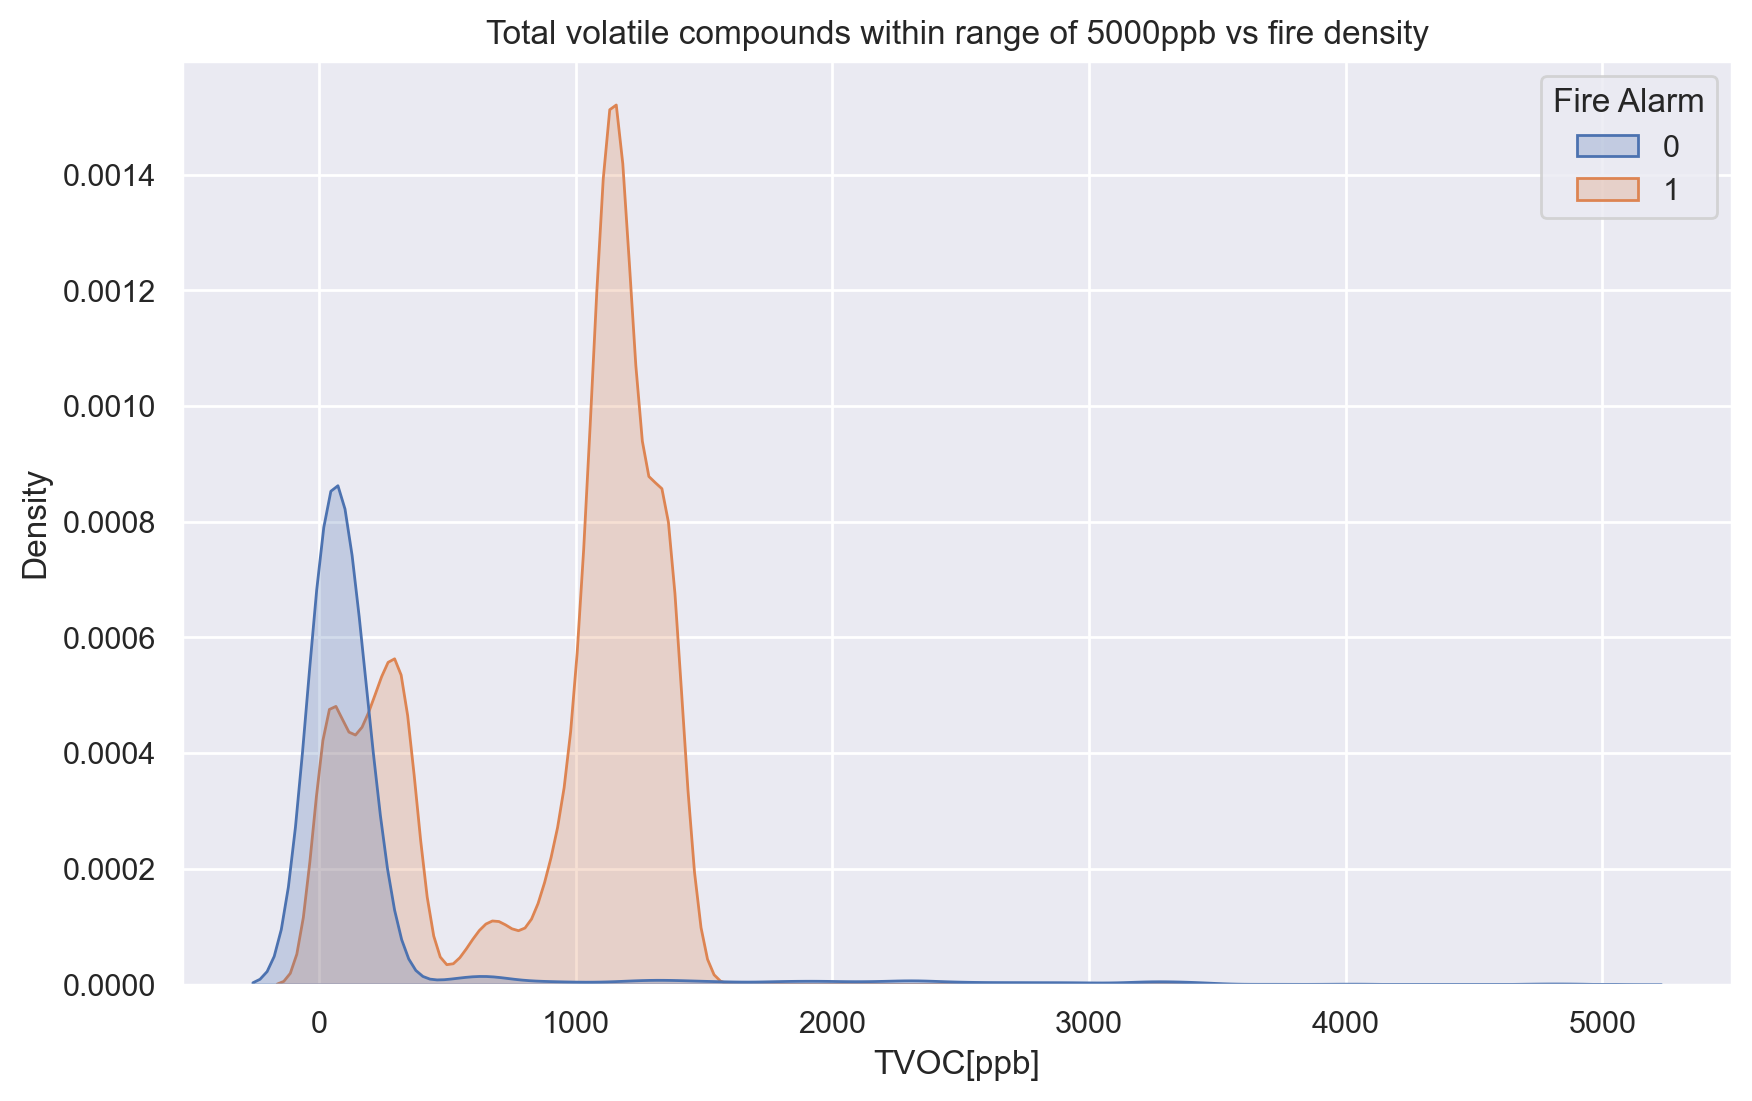

In [137]:
plt.figure(figsize=(10,6))
sns.kdeplot( data=filtered_tvoc, x='TVOC[ppb]', hue='Fire Alarm',fill = True)
plt.title('Total volatile compounds within range of 5000ppb vs fire density')

From visualisation of above graph it can be analysed that density of fire is are highest when Total Volatile Organic Compounds concetration is about 1000 to 1500 and at higher concentration of TVOC spread of density of yes fire and no fire is almost same

In [138]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

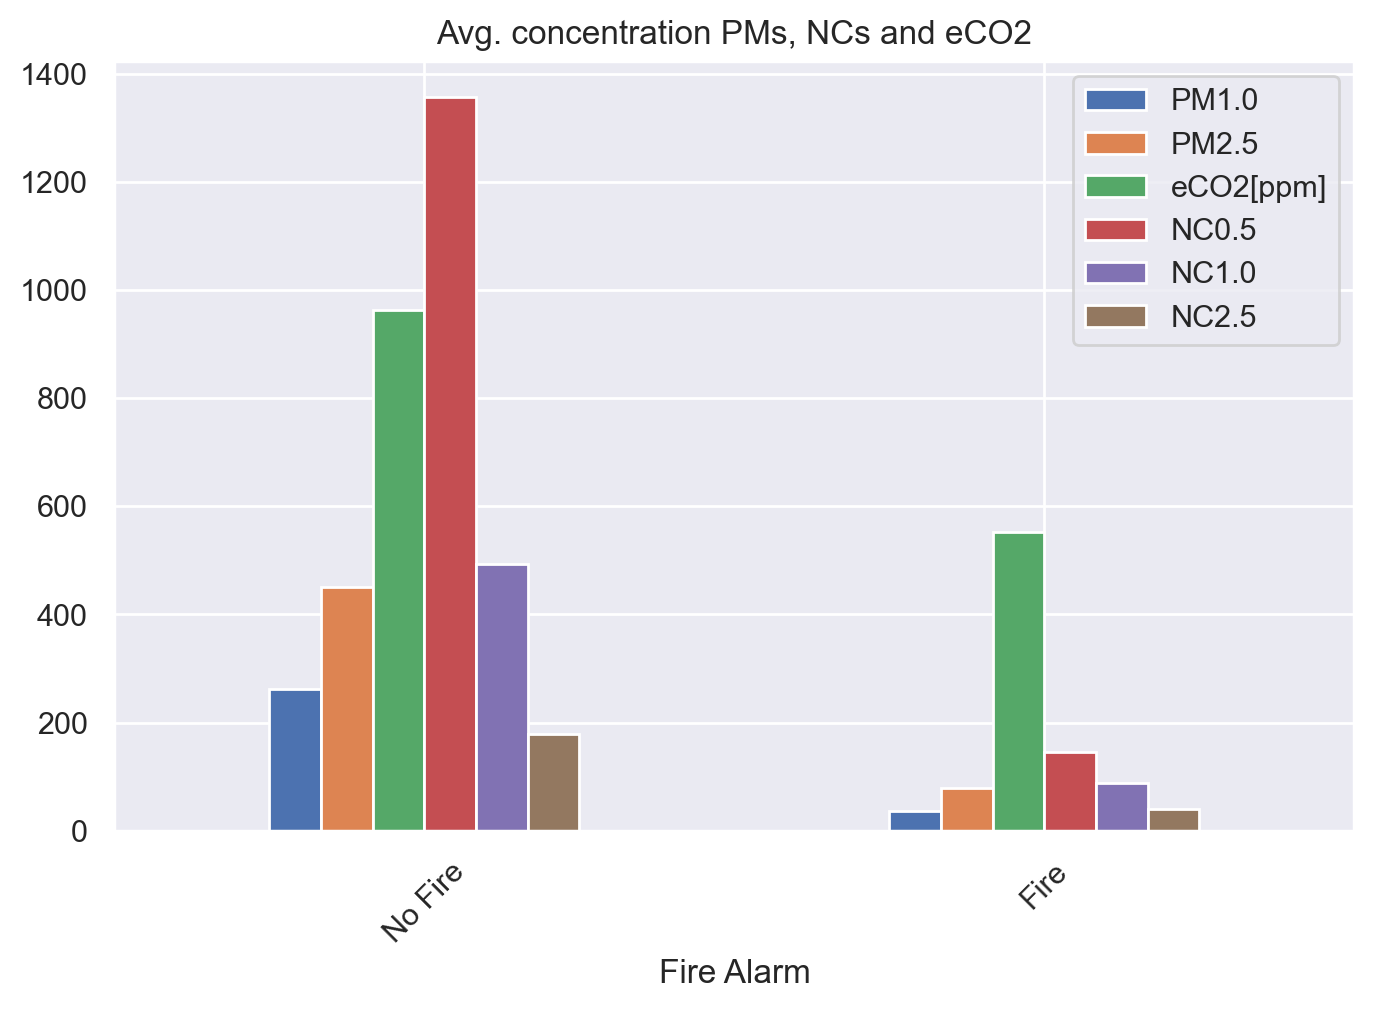

In [139]:
plt.figure(figsize=(10,8))
rcParams["figure.figsize"] = 8, 5
df.groupby(['Fire Alarm'])[['PM1.0','PM2.5','eCO2[ppm]','NC0.5', 'NC1.0',
       'NC2.5']].mean().plot(kind = 'bar')
plt.xticks(ticks = [0,1],labels=['No Fire','Fire'], rotation=45)
plt.title('Avg. concentration PMs, NCs and eCO2')
plt.show()

During no fire cases average value of concetration of PMs, NCs and eCO2 are pretty high.

## Creating Categorical values

In [140]:
df_categorial = df.copy(deep=True)
df_categorial.sample(10)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
44937,26.980,47.82,1212,407,12934,19439,938.732,1.65,1.72,11.36,1.772,0.040,1
40126,26.810,48.20,1036,429,12876,19469,938.816,1.80,1.87,12.40,1.934,0.044,1
49156,24.680,51.93,1176,400,13027,19433,938.754,1.89,1.96,12.99,2.026,0.046,1
55381,43.270,31.50,12288,521,12750,19175,936.878,0.36,0.38,2.50,0.390,0.009,0
38695,27.020,47.31,1132,508,12853,19457,938.884,2.19,2.28,15.10,2.355,0.053,1
1626,25.292,52.07,21,400,13117,20013,939.603,0.69,0.71,4.72,0.736,0.017,0
13303,20.409,52.15,1065,522,12843,19458,938.915,1.86,1.93,12.81,1.997,0.045,1
54549,28.590,40.52,0,400,13013,20735,937.426,2.02,2.10,13.91,2.170,0.049,0
2921,12.573,49.34,161,400,13146,20010,939.627,1.05,1.09,7.21,1.124,0.025,0
60599,12.242,38.46,0,400,13436,21275,937.381,1.96,2.04,13.52,2.109,0.048,0


In [141]:
df_categorial.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [142]:
def categorize_temperature(temperature):
      if temperature < 0:
        return 'very low'
      elif temperature < 10:
        return 'low'
      elif temperature < 20:
        return 'moderate'
      elif temperature < 30:
        return 'high'
      else:
        return 'very high'


df_categorial['TemperatureCat'] = df_categorial['Temperature[C]'].apply(categorize_temperature)
df_categorial[['Temperature[C]','TemperatureCat']].sample(8)

,Temperature[C],TemperatureCat
57251,25.506,high
43385,25.950,high
29469,20.640,high
16963,14.132,moderate
29180,20.130,high
43963,26.630,high
39986,24.520,high
60047,18.845,moderate


In [143]:
def categorize_humidity(humidity):
      if humidity < 30:
        return 'low'
      elif temperature < 60:
        return 'moderate'
      else:
        return 'high'
    
df_categorial['HumidityCat'] = df_categorial['Humidity[%]'].map(lambda x: 'Low' if x<30 else ('moderate' if x<60 else 'high'))
df_categorial[['Humidity[%]','HumidityCat']].sample(8)

,Humidity[%],HumidityCat
59145,41.96,moderate
41993,47.77,moderate
21962,53.41,moderate
44284,47.37,moderate
5192,48.12,moderate
60786,42.20,moderate
55868,20.07,Low
5853,51.27,moderate


In [144]:
df_categorial['FireAlarm'] = df_categorial['Fire Alarm'].map(lambda x: 'Yes' if x == 1 else 'No')
df_categorial[['FireAlarm']].sample(8)

,FireAlarm
41422,Yes
55833,No
60880,No
52707,No
13269,Yes
33466,Yes
53521,No
42463,Yes


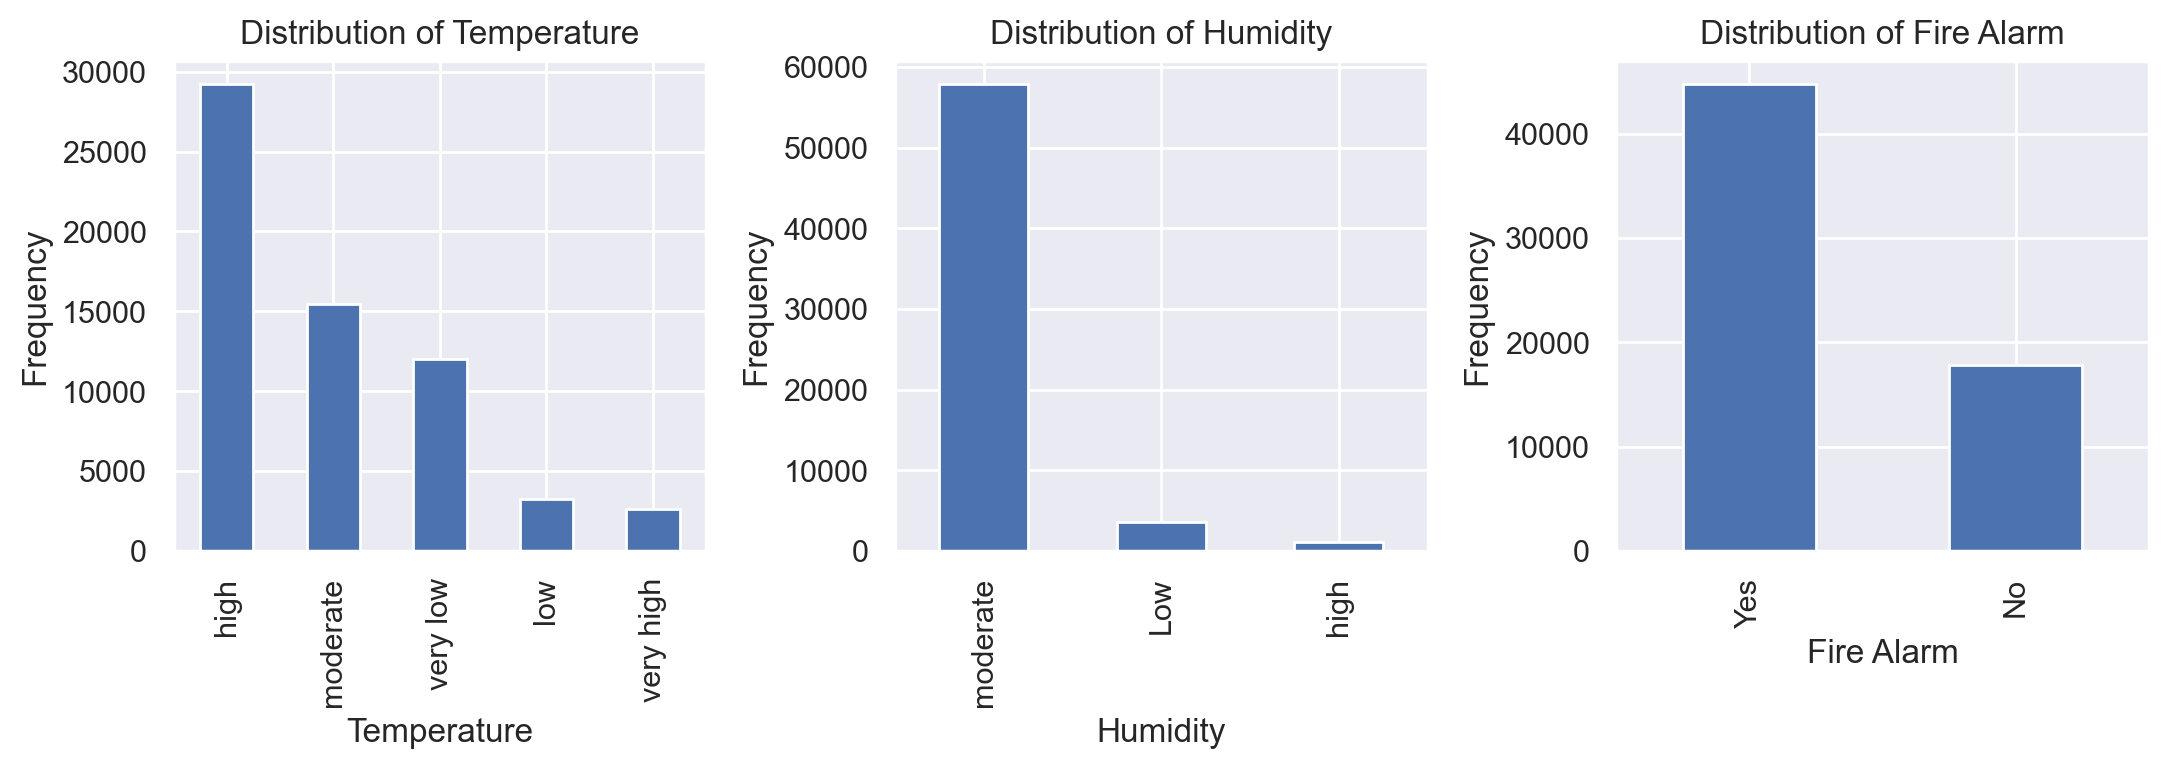

In [145]:
plt.figure(figsize = [11,4])

plt.subplot(1,3,1)
df_categorial['TemperatureCat'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
df_categorial['HumidityCat'].value_counts().plot(kind='bar')
plt.title("Distribution of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
df_categorial['FireAlarm'].value_counts().plot(kind='bar')
plt.title("Distribution of Fire Alarm")
plt.xlabel("Fire Alarm")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [146]:
df.sample(3)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
2021,22.37,47.76,43,400,13138,20009,939.645,0.74,0.77,5.09,0.793,0.018,0
32948,19.82,49.64,314,400,13099,19952,939.405,0.47,0.49,3.24,0.506,0.011,1
47776,24.69,52.87,1364,413,12965,19386,938.722,1.58,1.64,10.88,1.697,0.038,1


In [148]:
df_categorial[['TemperatureCat','HumidityCat','FireAlarm']].sample(3)

,TemperatureCat,HumidityCat,FireAlarm
57092,high,moderate,No
30586,high,moderate,Yes
51445,high,moderate,No


## Data Modeling

In [149]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 

from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve

import time

import warnings
warnings.filterwarnings('ignore')

In [150]:
X = df.drop("Fire Alarm",axis=1)
Y = df['Fire Alarm']

In [151]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50104, 12)
(12526, 12)
(50104,)
(12526,)


In [152]:
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [153]:
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [154]:
Name = []
Accuracy = []
Precision = []
Recall = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    precisionScore = precision_score(prediction,y_test)
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall.append(recallScore)
    Time_Taken.append(end-begin)

In [155]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Recall,Precision,Time Taken
0,KNeighborsClassifier,0.998164,0.998208,0.999215,0.996217
1,SGDClassifier,0.909388,0.906113,0.973658,0.118517
2,LogisticRegression,0.897972,0.909286,0.951687,0.100545
3,RandomForestClassifier,1.000000,1.000000,1.000000,4.679883
4,GradientBoostingClassifier,0.999521,0.999440,0.999888,10.814544
5,AdaBoostClassifier,0.999521,0.999440,0.999888,2.736579
6,BaggingClassifier,0.999840,0.999888,0.999888,1.328838
7,SVC,0.968306,0.964169,0.992378,14.622329
8,GaussianNB,0.766326,0.761655,0.977917,0.014000
9,DummyClassifier,0.712199,0.712199,1.000000,0.000997


In [156]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

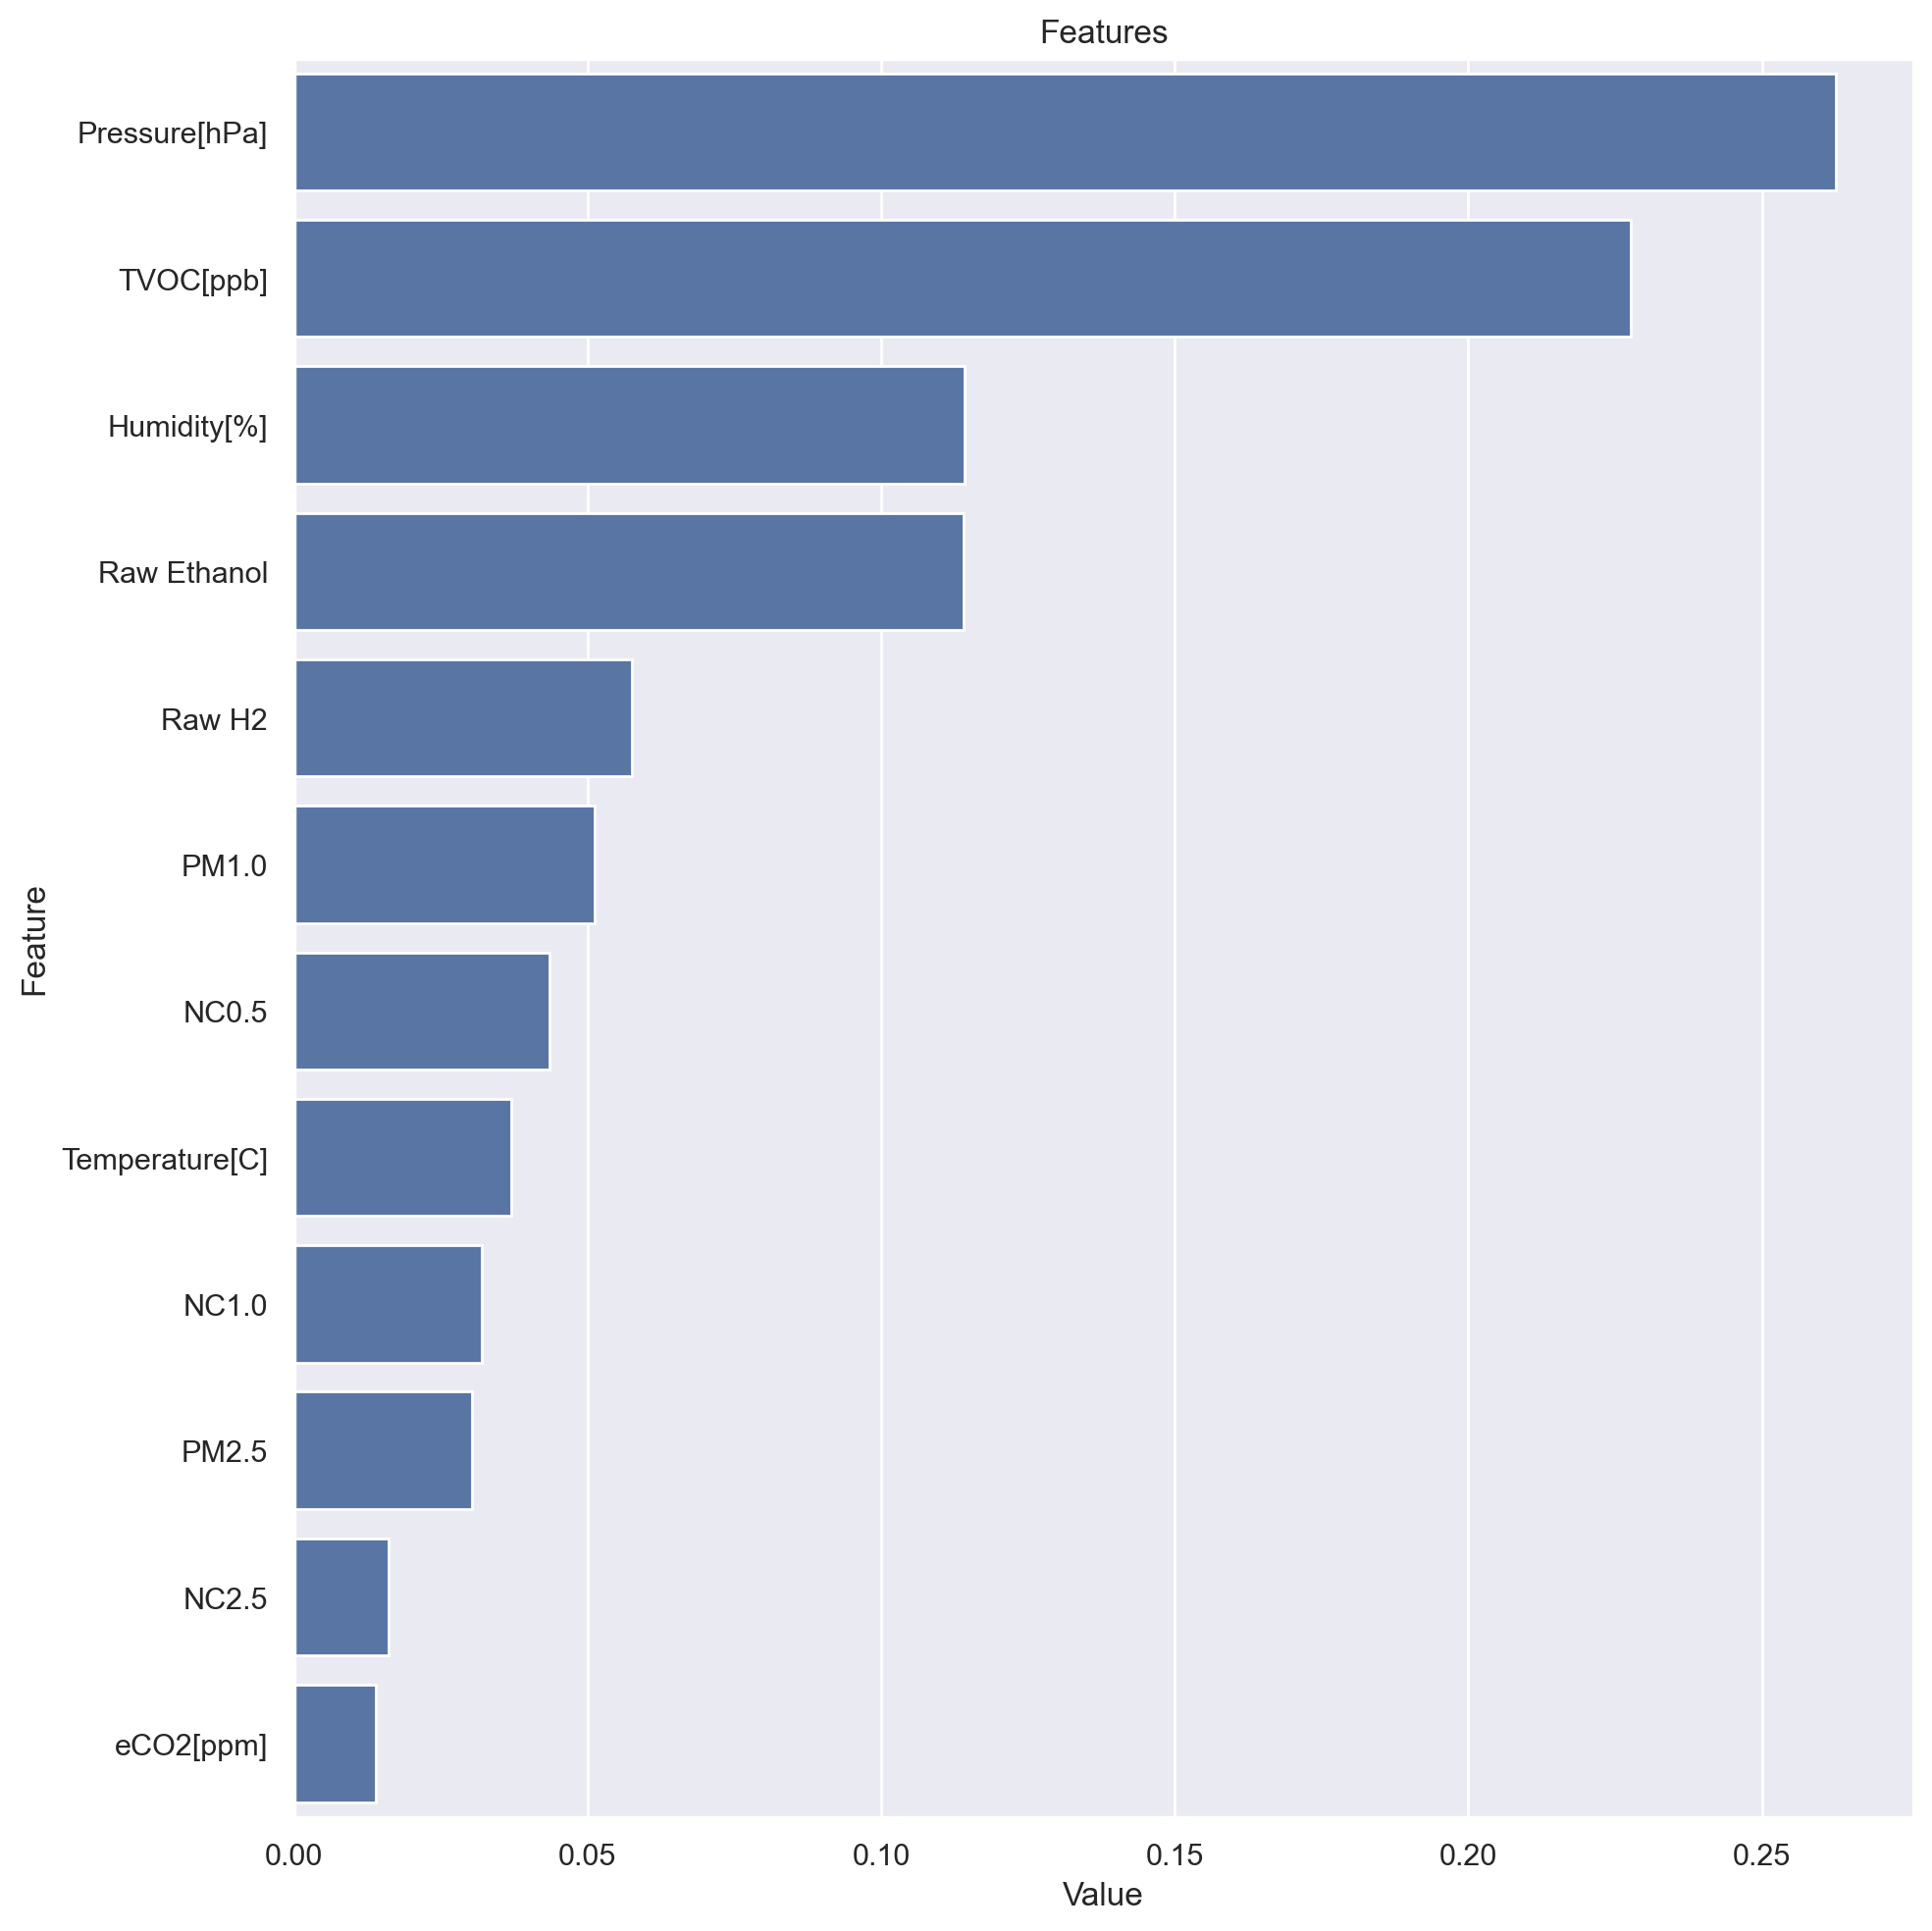

In [157]:
plot_importance(RandomForestClassifier().fit(X_train,y_train), X)

### Random Forest Classifier

In [158]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [159]:
y_pred_rf = rf_model.predict(X_test)

In [160]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_rf))


Confusion Matrix:
 [[3605    0]
 [   0 8921]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



### Logistic regression

<Axes: ylabel='Feature'>

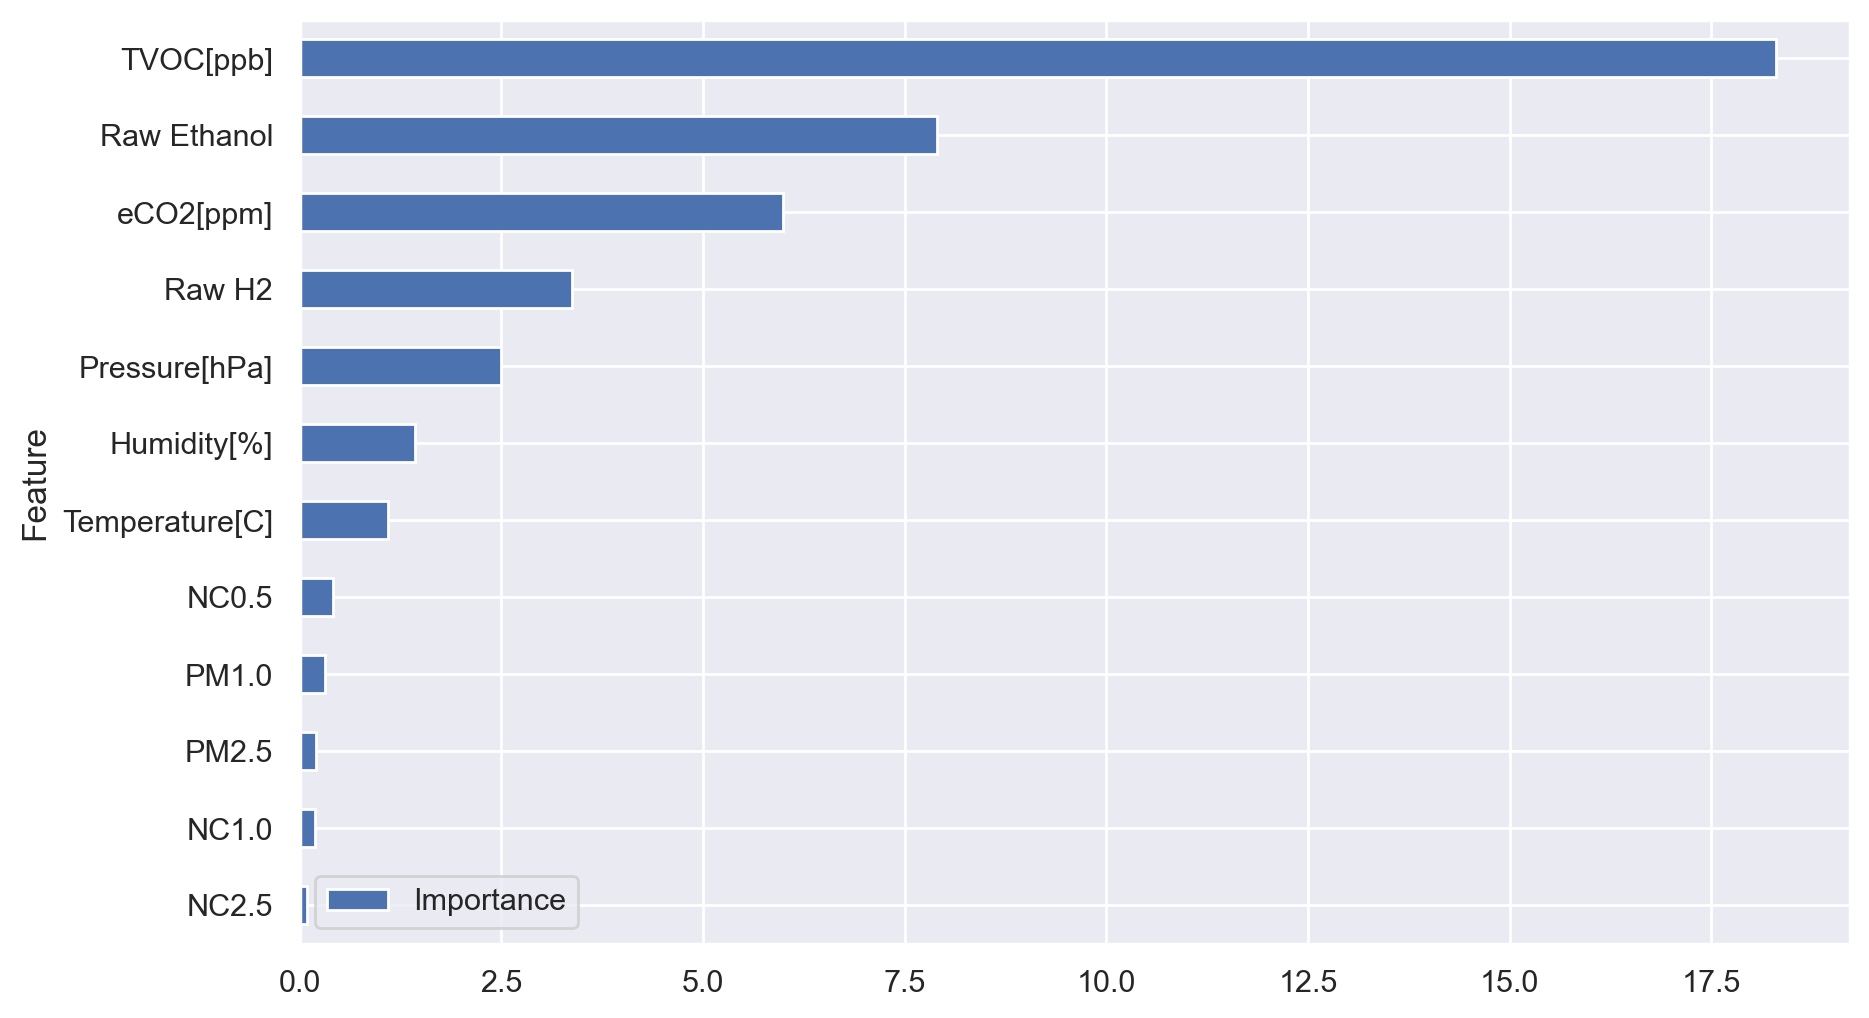

In [161]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


coefficients = lr_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [162]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [163]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [164]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[2758  847]
 [ 431 8490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      3605
           1       0.91      0.95      0.93      8921

    accuracy                           0.90     12526
   macro avg       0.89      0.86      0.87     12526
weighted avg       0.90      0.90      0.90     12526



### ExtraTree Classifier

In [165]:
tc_model = ExtraTreeClassifier()
tc_model.fit(X_train,y_train)


ExtraTreeClassifier()

In [166]:
y_pred_tc = tc_model.predict(X_test)

In [167]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_tc))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_tc))

Confusion Matrix:
 [[3601    4]
 [  18 8903]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



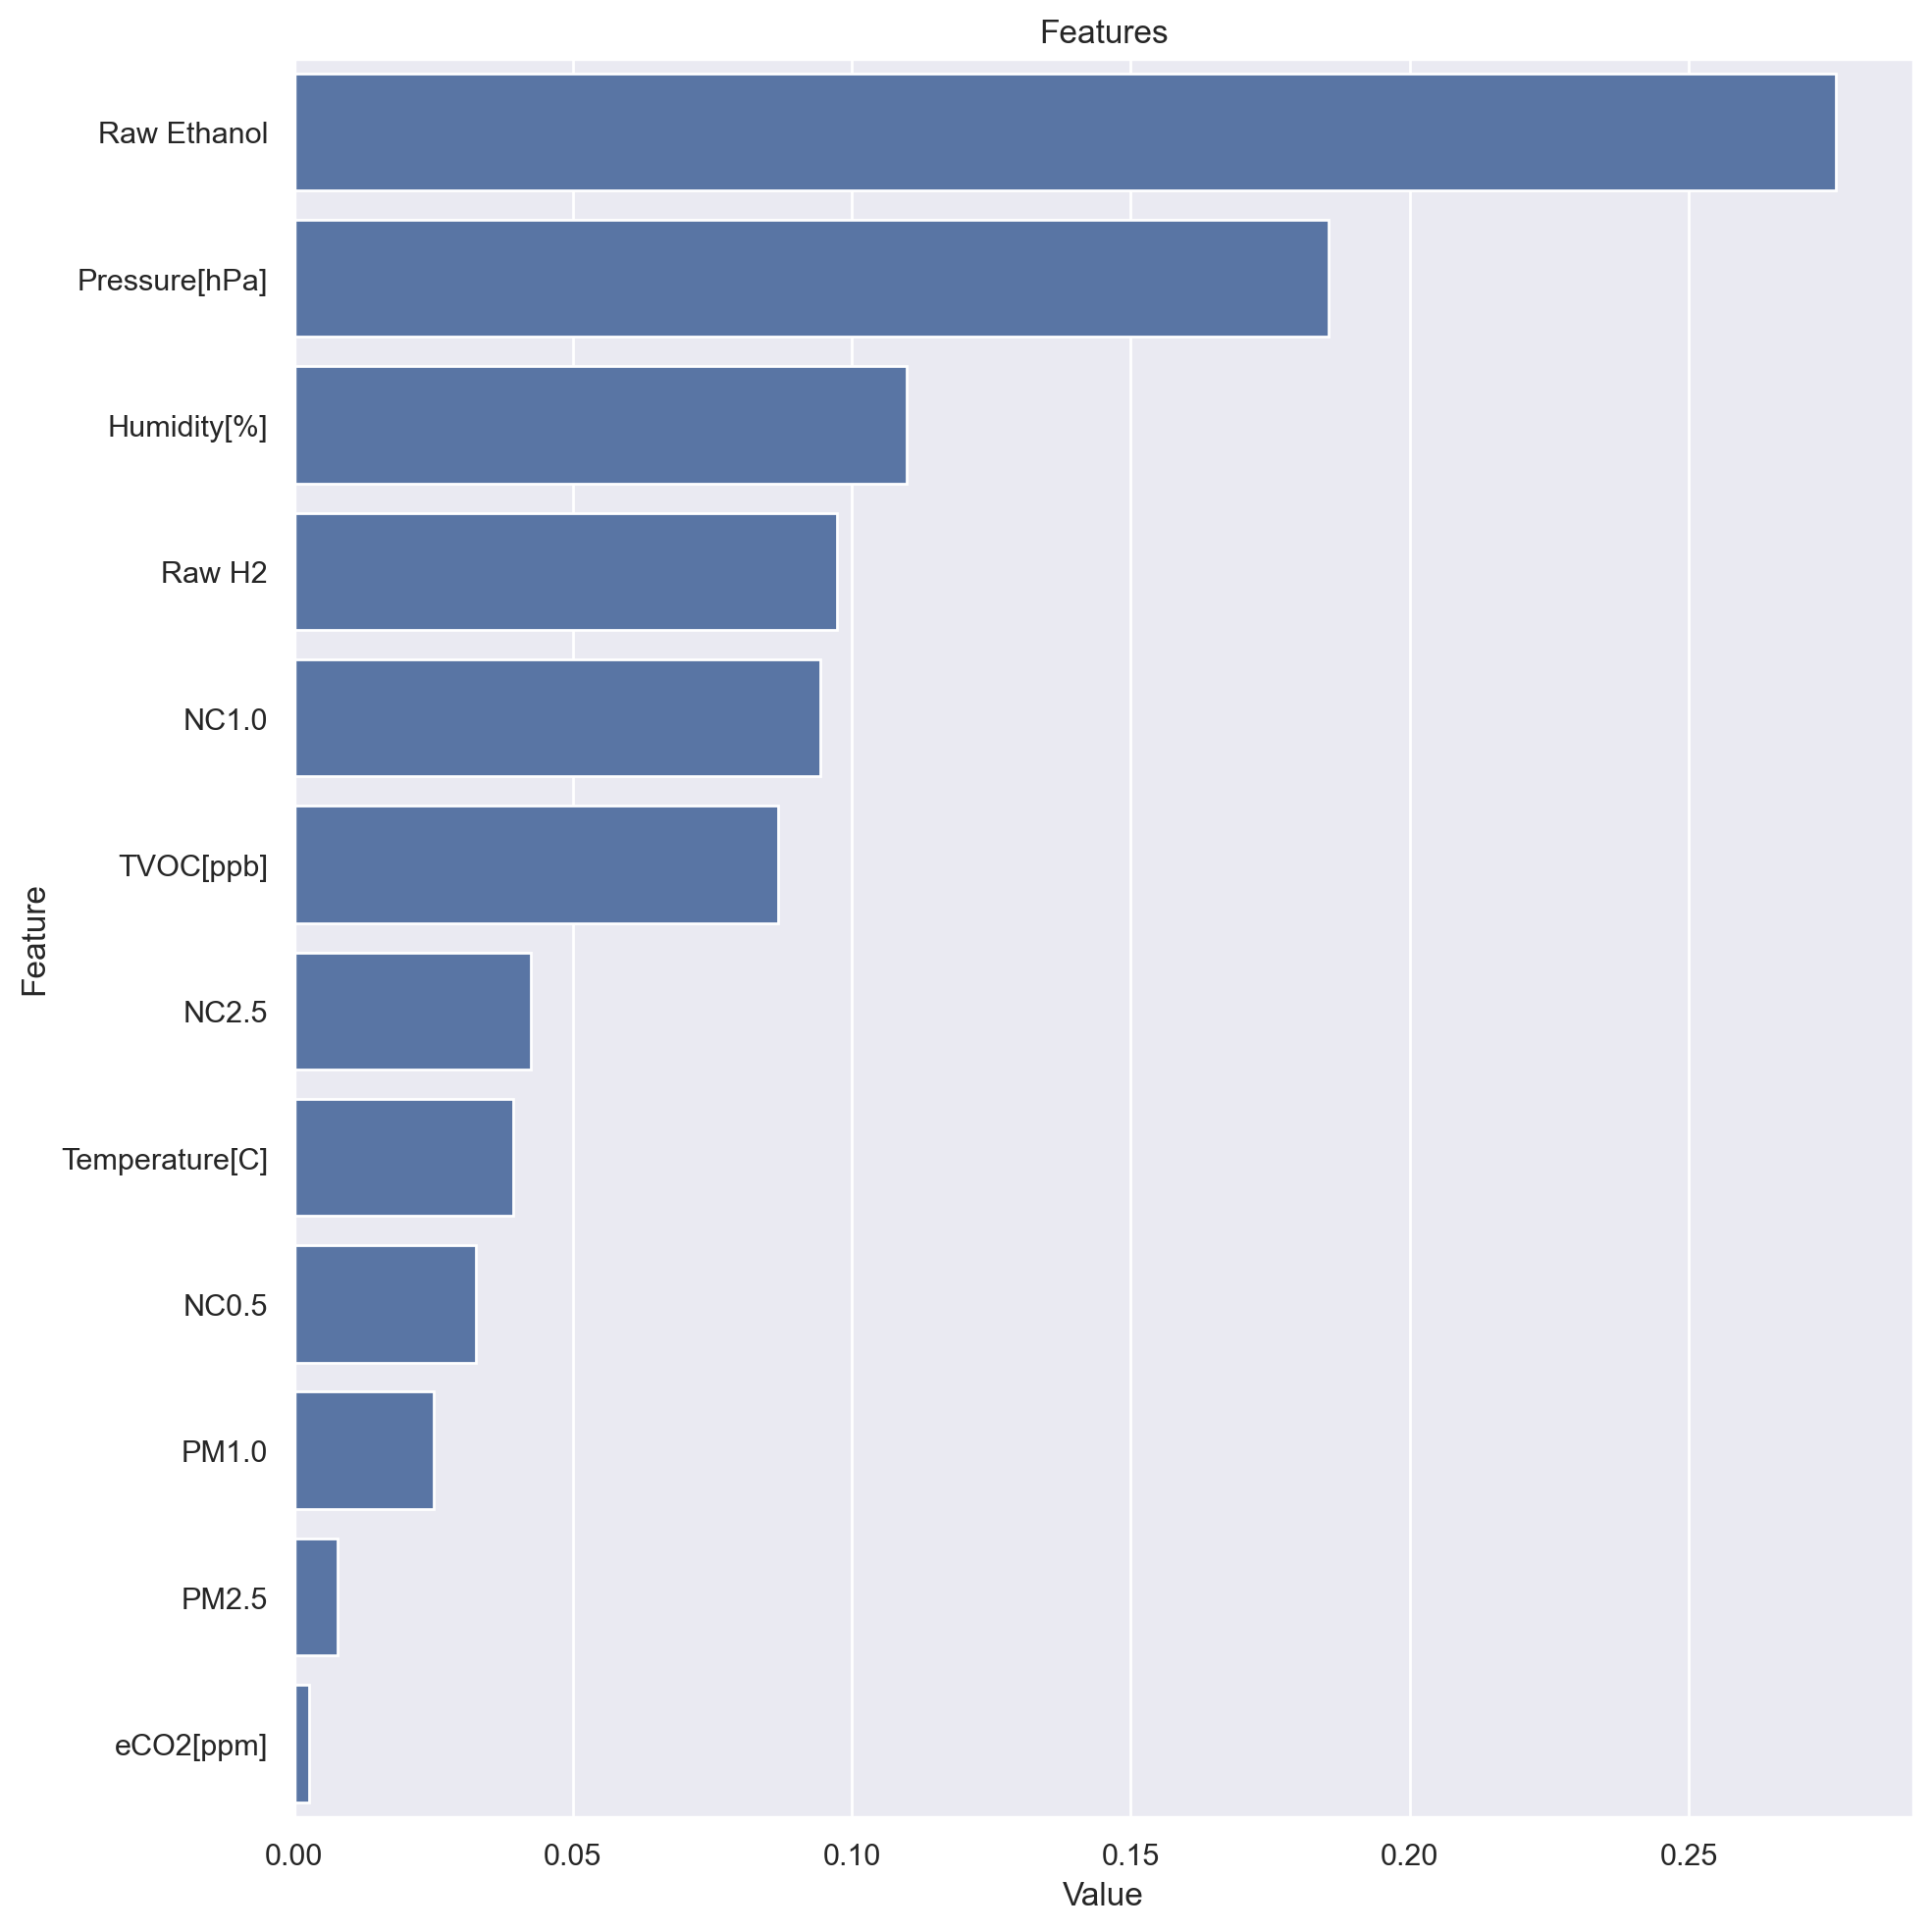

In [168]:
plot_importance(tc_model.fit(X_train,y_train), X)


### Handle Imbalance using SMOTE Over Sampling

In [169]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [170]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

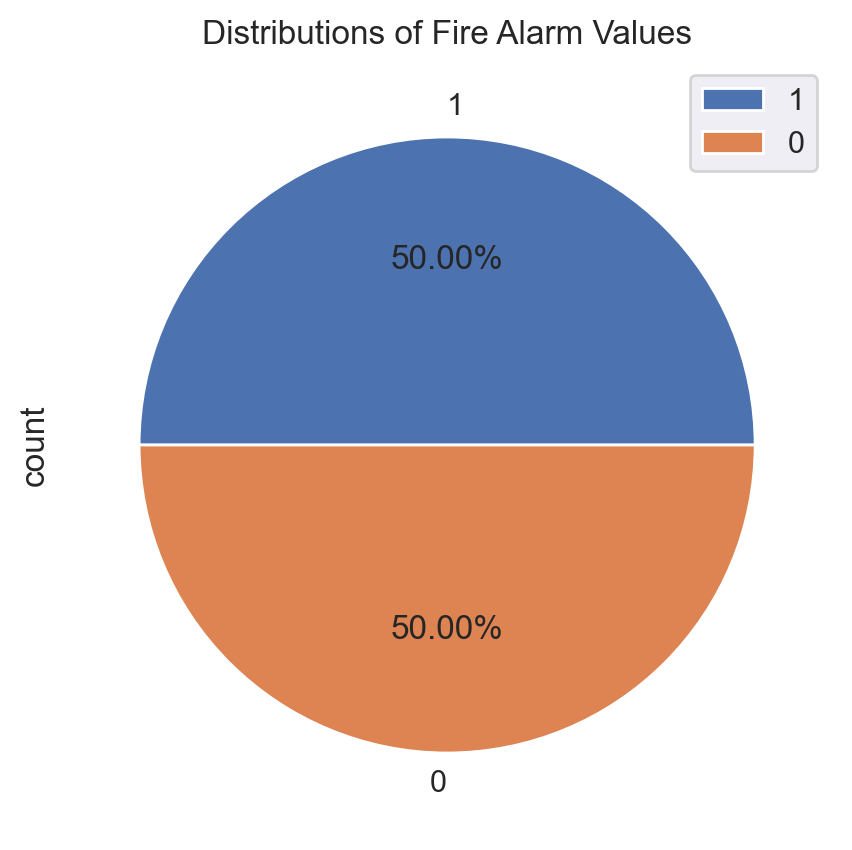

In [171]:
y_train_smote.value_counts().plot.pie( autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

In [172]:
Name_smote = []
Accuracy_smote = []
Precision_smote = []
Recall_smote = []
Time_Taken_smote = []
for model in models:
    Name_smote.append(type(model).__name__)
    begin = time.time()
    model.fit(x_train_smote,y_train_smote)
    prediction = model.predict(x_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy_smote.append(accuracyScore)
    precisionScore = precision_score(prediction,y_test)
    Precision_smote.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall_smote.append(recallScore)
    Time_Taken_smote.append(end-begin)

In [173]:
Dict = {'Name':Name_smote,'Accuracy':Accuracy_smote,'Recall':Recall_smote,'Precision':Precision_smote,'Time Taken':Time_Taken_smote}
model_df = pd.DataFrame(Dict)
model_df.sort_values(by='Accuracy', ascending=False)

,Name,Accuracy,Recall,Precision,Time Taken
3,RandomForestClassifier,1.000000,1.000000,1.000000,7.488089
6,BaggingClassifier,0.999920,0.999888,1.000000,2.388361
0,KNeighborsClassifier,0.999601,0.999440,1.000000,0.898635
4,GradientBoostingClassifier,0.999521,0.999664,0.999664,20.752167
5,AdaBoostClassifier,0.999521,0.999664,0.999664,4.720995
10,ExtraTreeClassifier,0.998962,0.999551,0.998991,0.022001
2,LogisticRegression,0.890388,0.937413,0.906625,0.263543
7,SVC,0.795705,0.988483,0.721556,111.183885
8,GaussianNB,0.768322,0.763367,0.977805,0.018511
1,SGDClassifier,0.292512,0.893333,0.007510,1.232162


In [175]:
def cross_validate_models(models, X, y, cv=5):
    cv_results = []
    model_names = []
    for model in models:
        print(f"----> {model}")
        model_names.append(type(model).__name__)
        scores = cross_val_score(model, X, y, cv=cv)
        cv_results.append(scores.mean())
    
    df_results = pd.DataFrame({'Model': model_names, 'Mean CV Score': cv_results})
    return df_results


In [176]:
top_models = [RandomForestClassifier(),BaggingClassifier(), KNeighborsClassifier(),GradientBoostingClassifier(),ExtraTreeClassifier(),
         AdaBoostClassifier(),LogisticRegression(), SGDClassifier()]

In [177]:
cross_val_results_df = cross_validate_models(top_models, X, Y, cv=5)

----> RandomForestClassifier()
----> BaggingClassifier()
----> KNeighborsClassifier()
----> GradientBoostingClassifier()
----> ExtraTreeClassifier()
----> AdaBoostClassifier()
----> LogisticRegression()
----> SGDClassifier()


In [178]:
cross_val_results_df.sort_values('Mean CV Score', ascending=False)

,Model,Mean CV Score
2,KNeighborsClassifier,0.979339
5,AdaBoostClassifier,0.942823
3,GradientBoostingClassifier,0.932732
0,RandomForestClassifier,0.927782
4,ExtraTreeClassifier,0.878445
1,BaggingClassifier,0.864266
6,LogisticRegression,0.813684
7,SGDClassifier,0.800064
